In [1]:
!pip3 install calplot

You should consider upgrading via the 'e:\pythonforselenium\python.exe -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import calplot
import warnings
warnings.filterwarnings('ignore')

In [3]:
dftrain = pd.read_csv('Train.csv')
dftest = pd.read_csv('Test.csv')

In [4]:
dftrain.head()

,session_id,session_number,client_agent,device_details,date,purchased,added_in_cart,checked_out,time_spent
0,57f879e70d3c5fc2a98102d64c9fd84e,715,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2020-01-22,1,0,0,236.886
1,a5442b0c7c33d0a811e7661e556b2de8,55,Product/8.0 iPhone/8.1.3,iPhone - iOS,2020-02-27,1,0,0,1277.455
2,305cb1486ed8610c00b37007926cb2c4,11,Mozilla/5.0 (iPhone; CPU iPhone OS 7_1_2 like ...,iPhone - MobileWeb,2019-08-01,0,0,0,21.704
3,f2c1ecc9993f0071df91ba178450498c,2794,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Desktop - IE,2019-12-30,0,1,0,455.201
4,e460830ae295e55d2216ebdc761ab9a6,3674,Mozilla/5.0 (iPhone; CPU iPhone OS 7_1_1 like ...,iPhone - Web,2019-09-10,0,0,0,1164.877


In [5]:
dftest.head()

,session_id,session_number,client_agent,device_details,date,purchased,added_in_cart,checked_out
0,0bf72b05b2cf70dc5e28c3c09f9c4f97,99,Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7....,Desktop - IE,2020-01-07,1,0,0
1,6bc696d99954e4f1367e845465186aef,935,Product/160393 Android/4.3 Device/samsung_GT-I...,Android Phone - Android,2020-02-13,0,0,0
2,3d8611a5ea0f621d205b67f09f663a89,902,Product/4.2.2 iPhone/7.1.2,iPhone - iOS,2019-10-14,1,0,0
3,a0351545c032fd0da36289410c6c3354,3223,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Desktop - IE,2020-01-26,0,0,0
4,dd8999772b0ab27225fb05e5df2f1da6,231,Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKi...,Desktop - Chrome,2020-01-29,0,0,0


In [6]:
dftrain.groupby(["purchased","added_in_cart","checked_out"], as_index=False).size()

,purchased,added_in_cart,checked_out,size
0,0,0,0,3847
1,0,0,1,11
2,0,1,0,682
3,0,1,1,25
4,1,0,0,679
5,1,0,1,12
6,1,1,0,126
7,1,1,1,47


Text(0.5, 1.0, 'Time spent distribution')

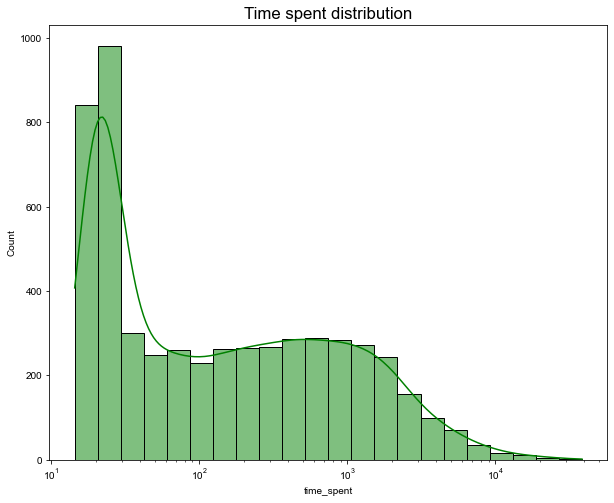

In [7]:
plt.figure(figsize=(10,8))
sns.histplot(dftrain['time_spent'],log_scale=10,kde=True,color='green')
sns.set_theme(style="ticks")
sns.set(font_scale=1.4)
plt.title('Time spent distribution')

Text(0.5, 1.0, 'Time Spent Boxplot')

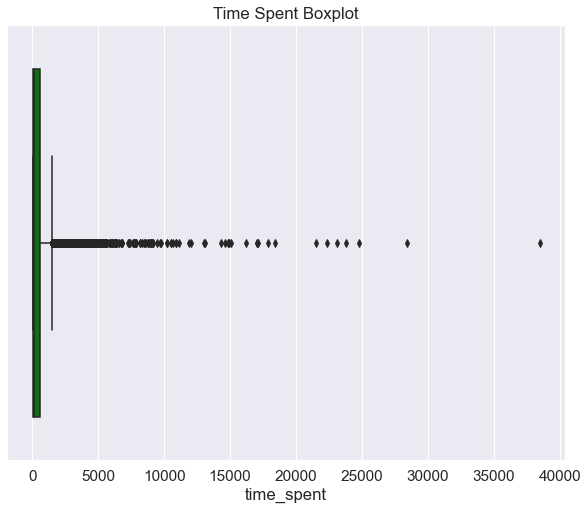

In [8]:
plt.figure(figsize=(10,8))
bx=sns.boxplot(data=dftrain ,x="time_spent",color="green")
plt.title("Time Spent Boxplot")

In [9]:
dftrain['time_spent'].describe()

count     5429.000000
mean       663.194292
std       1713.671664
min         14.400000
25%         22.699000
50%         98.312000
75%        600.463000
max      38494.025000
Name: time_spent, dtype: float64

In [10]:
dftrain["session_number"].describe()

count    5429.000000
mean     1072.835329
std      1436.351474
min        11.000000
25%       121.000000
50%       517.000000
75%      1397.000000
max      7722.000000
Name: session_number, dtype: float64

Text(0.5, 1.0, 'Session number distribution')

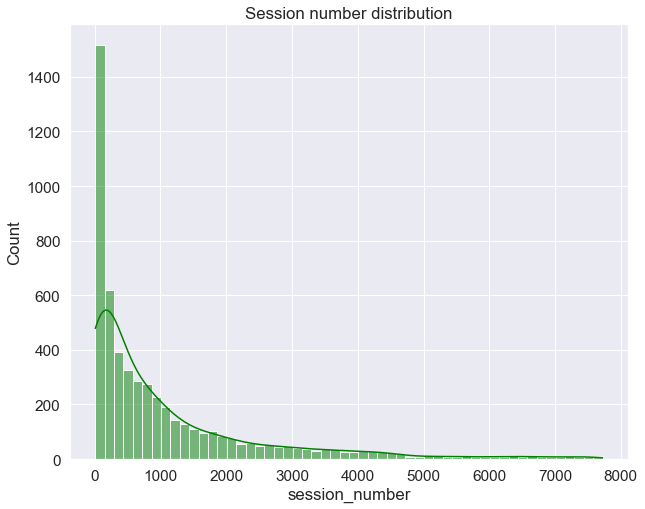

In [11]:
plt.figure(figsize=(10,8))
sns.histplot(dftrain['session_number'],kde=True,color='green')
plt.title('Session number distribution')

In [12]:
dftrain["session_number"].value_counts().head(10)

11     437
22     192
33     132
44     101
55      93
66      92
77      79
110     73
88      70
99      66
Name: session_number, dtype: int64

Text(0.5, 1.0, 'Various Devices Used to Visit The Site')

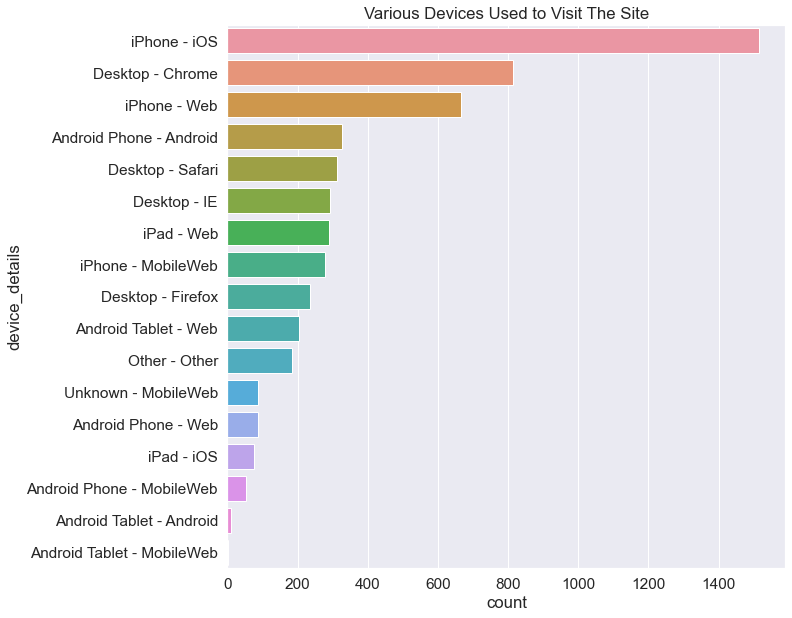

In [13]:
plt.figure(figsize=(10,10))
sns.countplot(y="device_details",
            data=dftrain,
            order= dftrain["device_details"].value_counts().index)       
plt.title("Various Devices Used to Visit The Site")

In [14]:
dftrain["device_details"].value_counts()

iPhone - iOS                  1515
Desktop - Chrome               815
iPhone - Web                   665
Android Phone - Android        326
Desktop - Safari               313
Desktop - IE                   292
iPad - Web                     289
iPhone - MobileWeb             277
Desktop - Firefox              234
Android Tablet - Web           203
Other - Other                  185
Unknown - MobileWeb             87
Android Phone - Web             86
iPad - iOS                      77
Android Phone - MobileWeb       54
Android Tablet - Android         9
Android Tablet - MobileWeb       2
Name: device_details, dtype: int64

Text(0.5, 1.0, "Different Devices's Time spent Distribution Using Violin Plot")

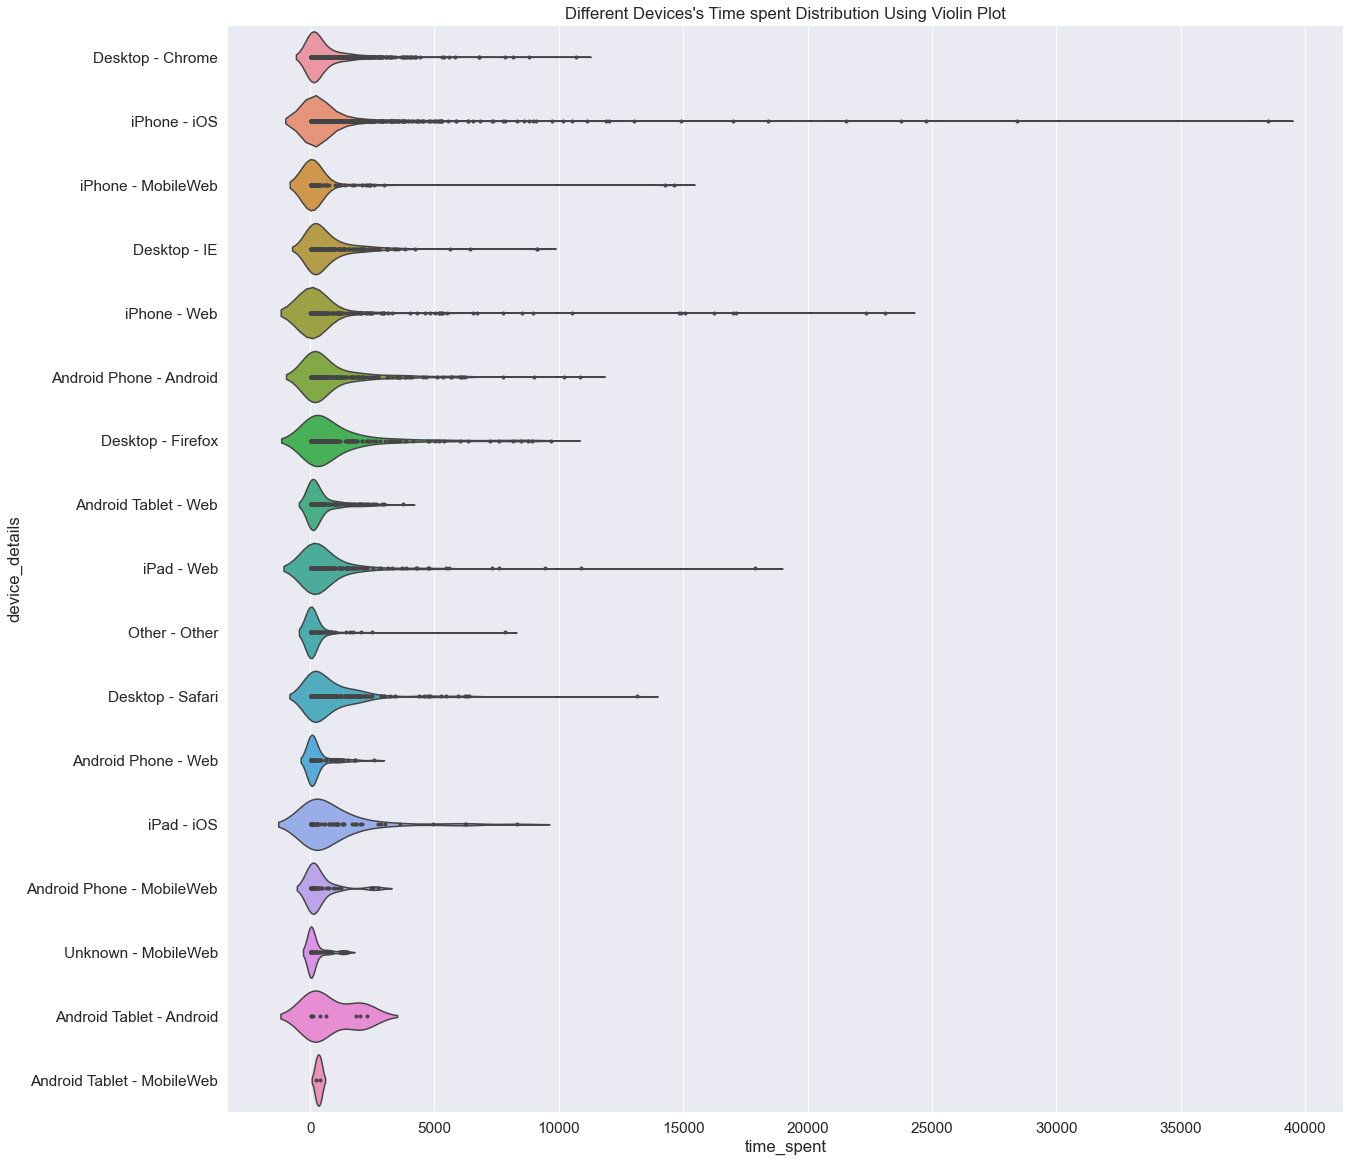

In [15]:
plt.figure(figsize=(20,20))
sns.violinplot(
    data=dftrain, inner="point",
    y="device_details", x="time_spent",scale="width"
)
plt.title("Different Devices's Time spent Distribution Using Violin Plot")

In [16]:
dftrain['date']=pd.to_datetime(dftrain['date'],errors='coerce')
dftest['date']=pd.to_datetime(dftest['date'],errors='coerce')

In [17]:
# # convert date column to unique value subtracting the max value 
dftrain['datepurch']=dftrain['date'].max()-dftrain['date']
dftest['datepurch']=dftest['date'].max()-dftest['date']

In [18]:
dftrain['day'],dftrain['day_label'],dftrain['day_number'],dftrain['month_number'],dftrain['month_label'],dftrain['year_quarter'],dftrain['week_of_year'],dftrain['year'] = dftrain['date'].dt.day,dftrain['date'].dt.day_name(), dftrain['date'].dt.dayofweek,dftrain['date'].dt.month,dftrain['date'].dt.strftime('%b'),dftrain['date'].dt.quarter,dftrain['date'].dt.week, dftrain['date'].dt.year


In [19]:
dftest['day'],dftest['day_label'],dftest['day_number'],dftest['month_number'],dftest['month_label'],dftest['year_quarter'],dftest['week_of_year'],dftest['year'] = dftest['date'].dt.day,dftest['date'].dt.day_name(), dftest['date'].dt.dayofweek,dftest['date'].dt.month,dftest['date'].dt.strftime('%b'),dftest['date'].dt.quarter,dftest['date'].dt.week,dftest['date'].dt.year

In [20]:
dftrain.head()

,session_id,session_number,client_agent,device_details,date,purchased,added_in_cart,checked_out,time_spent,datepurch,day,day_label,day_number,month_number,month_label,year_quarter,week_of_year,year
0,57f879e70d3c5fc2a98102d64c9fd84e,715,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2020-01-22,1,0,0,236.886,92 days,22,Wednesday,2,1,Jan,1,4,2020
1,a5442b0c7c33d0a811e7661e556b2de8,55,Product/8.0 iPhone/8.1.3,iPhone - iOS,2020-02-27,1,0,0,1277.455,56 days,27,Thursday,3,2,Feb,1,9,2020
2,305cb1486ed8610c00b37007926cb2c4,11,Mozilla/5.0 (iPhone; CPU iPhone OS 7_1_2 like ...,iPhone - MobileWeb,2019-08-01,0,0,0,21.704,266 days,1,Thursday,3,8,Aug,3,31,2019
3,f2c1ecc9993f0071df91ba178450498c,2794,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Desktop - IE,2019-12-30,0,1,0,455.201,115 days,30,Monday,0,12,Dec,4,1,2019
4,e460830ae295e55d2216ebdc761ab9a6,3674,Mozilla/5.0 (iPhone; CPU iPhone OS 7_1_1 like ...,iPhone - Web,2019-09-10,0,0,0,1164.877,226 days,10,Tuesday,1,9,Sep,3,37,2019


In [21]:
# dftrain=dftrain.iloc[:,np.r_[0:5,9:17,5:9]]

In [22]:
dftrain.head()

,session_id,session_number,client_agent,device_details,date,purchased,added_in_cart,checked_out,time_spent,datepurch,day,day_label,day_number,month_number,month_label,year_quarter,week_of_year,year
0,57f879e70d3c5fc2a98102d64c9fd84e,715,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2020-01-22,1,0,0,236.886,92 days,22,Wednesday,2,1,Jan,1,4,2020
1,a5442b0c7c33d0a811e7661e556b2de8,55,Product/8.0 iPhone/8.1.3,iPhone - iOS,2020-02-27,1,0,0,1277.455,56 days,27,Thursday,3,2,Feb,1,9,2020
2,305cb1486ed8610c00b37007926cb2c4,11,Mozilla/5.0 (iPhone; CPU iPhone OS 7_1_2 like ...,iPhone - MobileWeb,2019-08-01,0,0,0,21.704,266 days,1,Thursday,3,8,Aug,3,31,2019
3,f2c1ecc9993f0071df91ba178450498c,2794,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Desktop - IE,2019-12-30,0,1,0,455.201,115 days,30,Monday,0,12,Dec,4,1,2019
4,e460830ae295e55d2216ebdc761ab9a6,3674,Mozilla/5.0 (iPhone; CPU iPhone OS 7_1_1 like ...,iPhone - Web,2019-09-10,0,0,0,1164.877,226 days,10,Tuesday,1,9,Sep,3,37,2019


In [23]:
min(dftrain['date']),max(dftrain['date'])

(Timestamp('2019-05-06 00:00:00'), Timestamp('2020-04-23 00:00:00'))

<AxesSubplot:xlabel='date', ylabel='time_spent'>

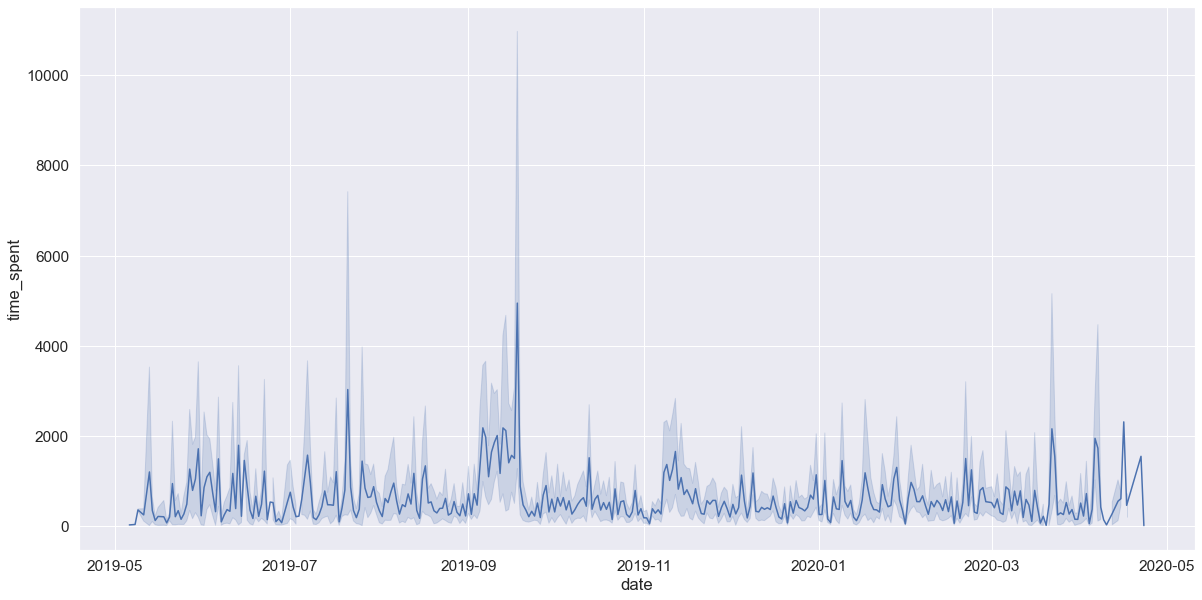

In [24]:
plt.figure(figsize=(20,10))
sns.lineplot(x="date",y="time_spent",
             data=dftrain)

In [25]:
month_year_spent = dftrain.groupby(['year','month_label','month_number']).agg({'time_spent':['sum']})
month_year_spent.columns =['time_spent']
month_year_spent = month_year_spent.reset_index()
month_year_spent=month_year_spent.sort_values("month_number", ascending=True)
month_year_spent

,year,month_label,month_number,time_spent
10,2020,Jan,1,301852.533
9,2020,Feb,2,306616.300
11,2020,Mar,3,173380.530
8,2020,Apr,4,56013.231
4,2019,May,5,72951.036
3,2019,Jun,6,138978.605
2,2019,Jul,7,299795.474
0,2019,Aug,8,238769.650
7,2019,Sep,9,1014014.472
6,2019,Oct,10,273100.187


<Figure size 864x720 with 0 Axes>

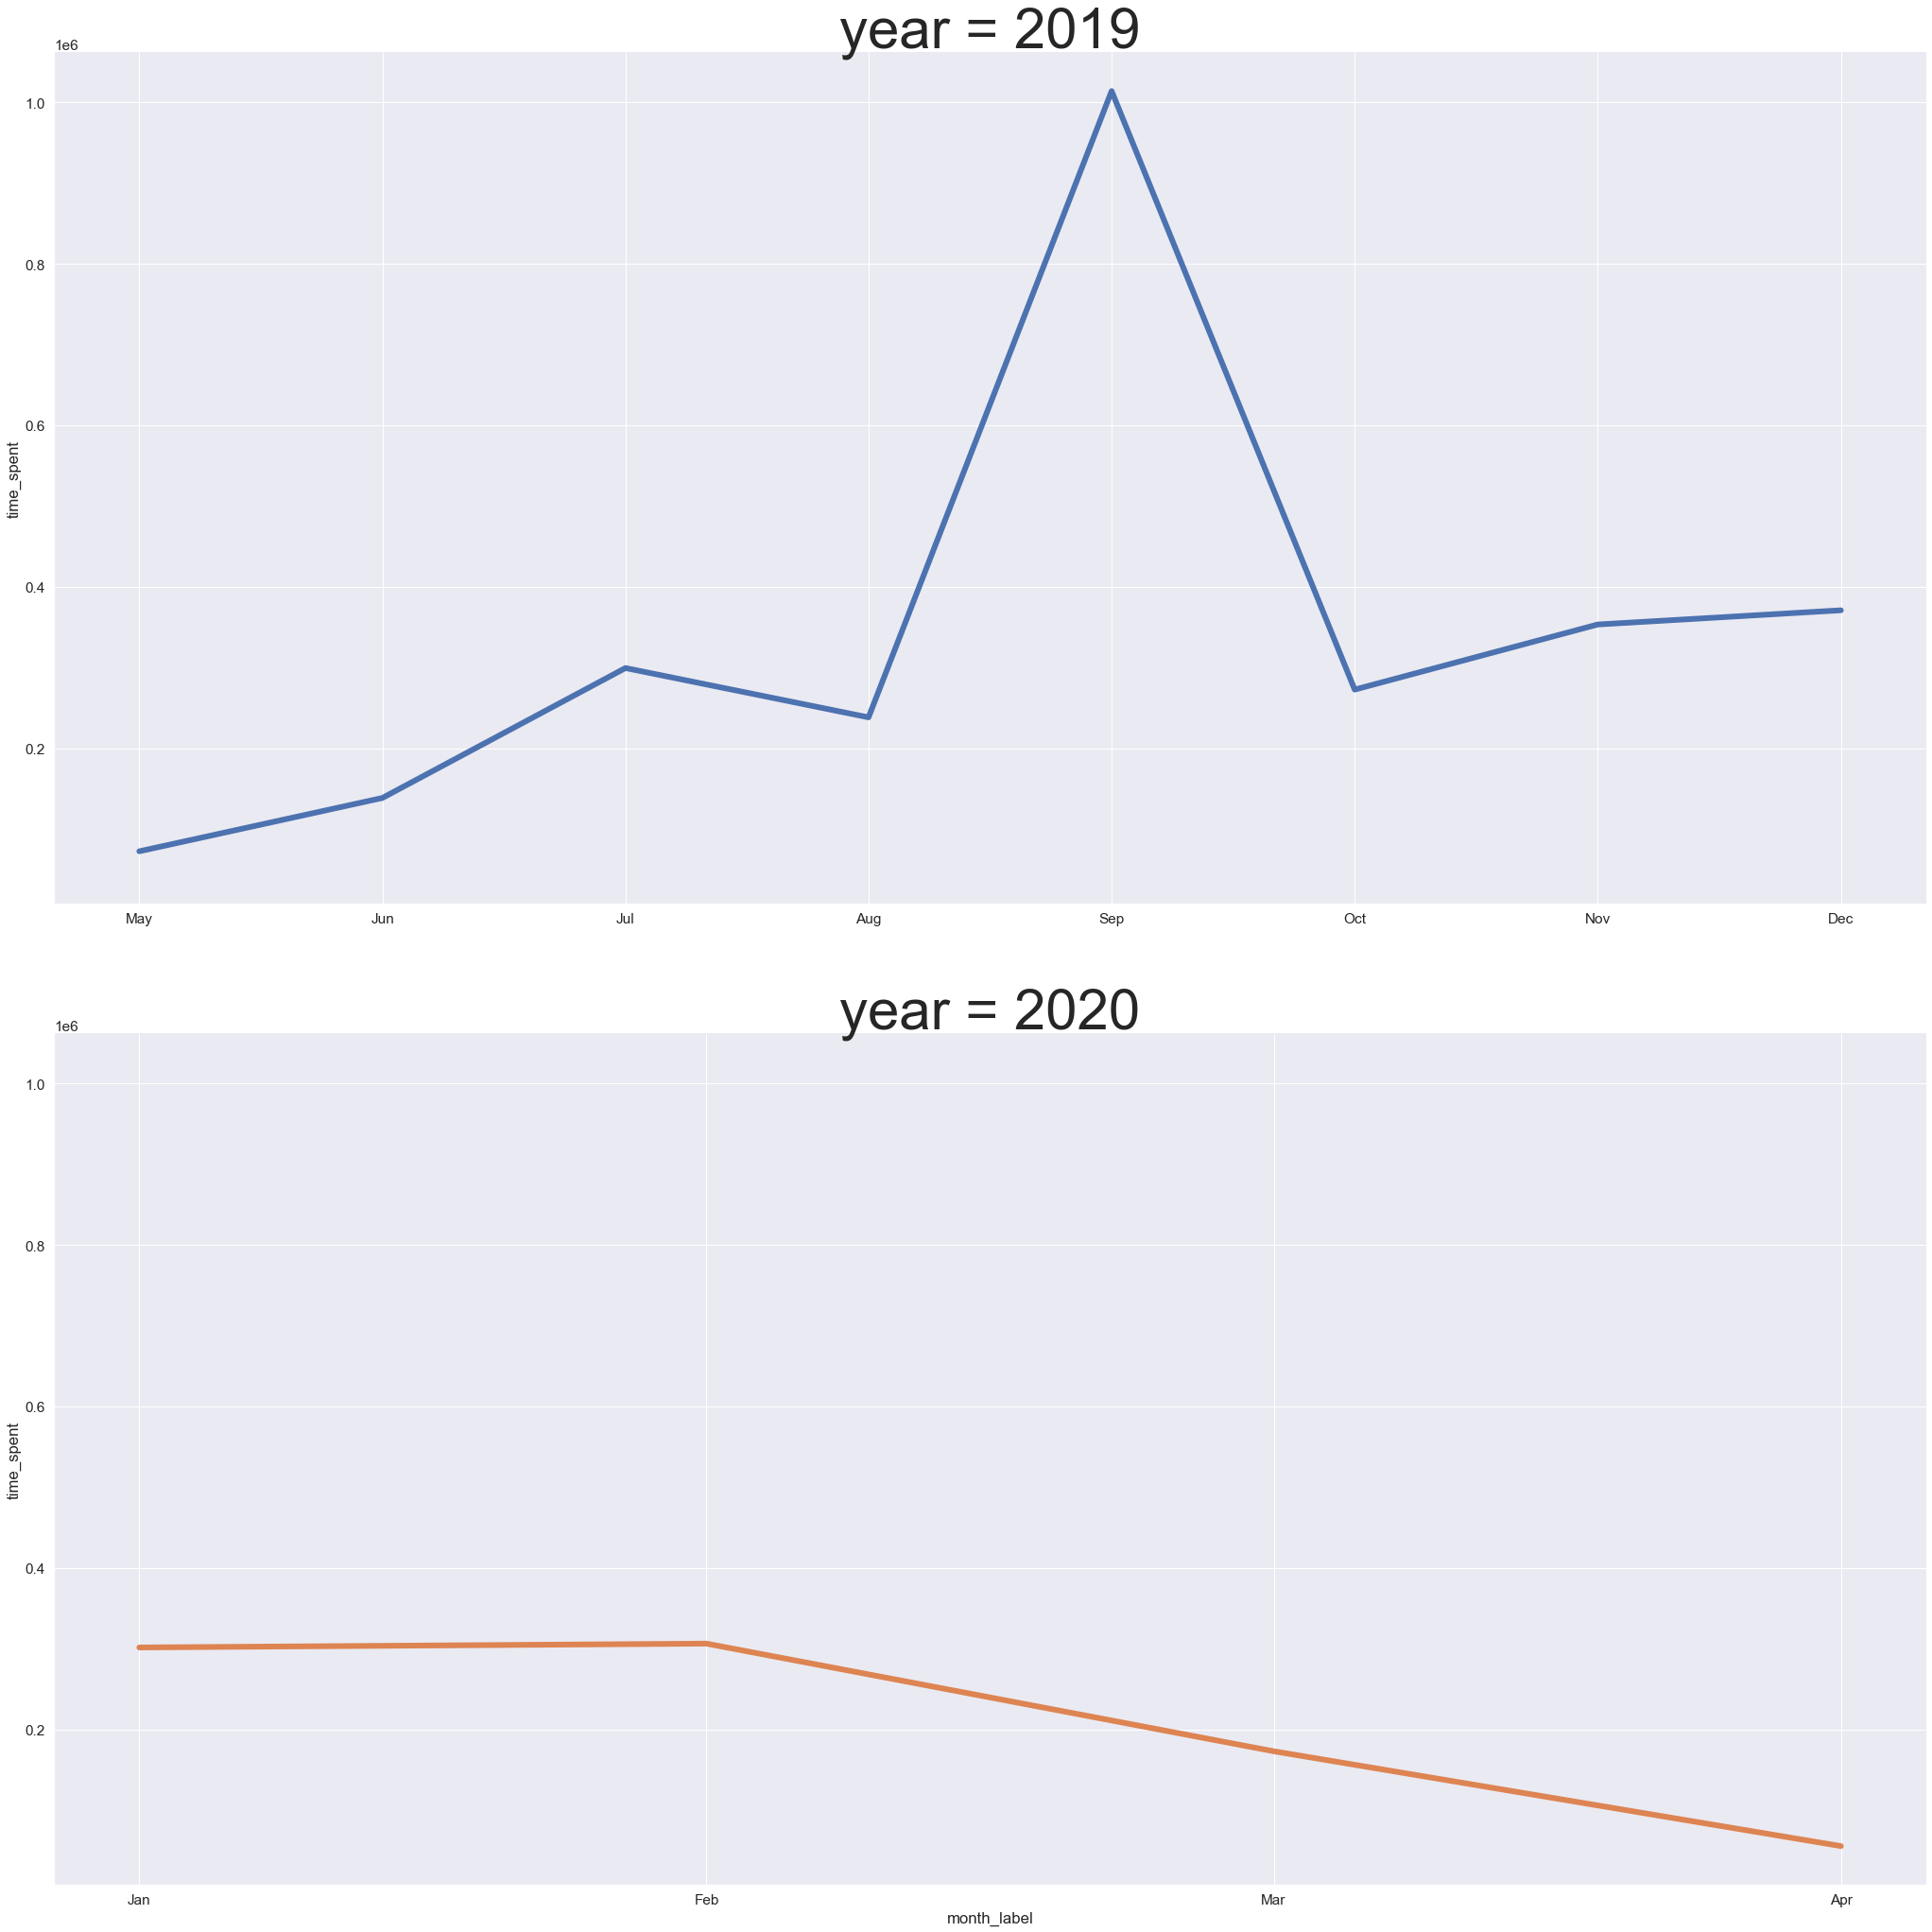

In [26]:
plt.figure(figsize=(12,10))
time_spent_year=sns.FacetGrid(month_year_spent,despine=True,row='year',hue='year',sharey=True,sharex=False,height=15,aspect=2)
sns.set(font_scale=5)
time_spent_year.map(sns.lineplot,'month_label','time_spent',linewidth = 6,sort=True)

The above plot shows that in the year 2019, September month has recorded the highest customer activity on the website.
In the year 2020 highest customer activity recored in the month of january and february.After february customer activity gradually decreased.

Let's see which week has recorded highest number of customer activity in the year 2019 & 2020.¶

In [27]:
week_year_spent =dftrain.groupby(['year','week_of_year']).agg({'time_spent':['sum']})
week_year_spent.columns=['time_spent']
week_year_spent= week_year_spent.reset_index()
week_year_spent= week_year_spent.sort_values('week_of_year', ascending=True)
week_year_spent

,year,week_of_year,time_spent
0,2019,1,43483.519
35,2020,1,24758.559
36,2020,2,87878.415
37,2020,3,54362.882
38,2020,4,70617.837
39,2020,5,106795.388
40,2020,6,96699.577
41,2020,7,53946.679
42,2020,8,69374.274
43,2020,9,53542.584


<Figure size 864x720 with 0 Axes>

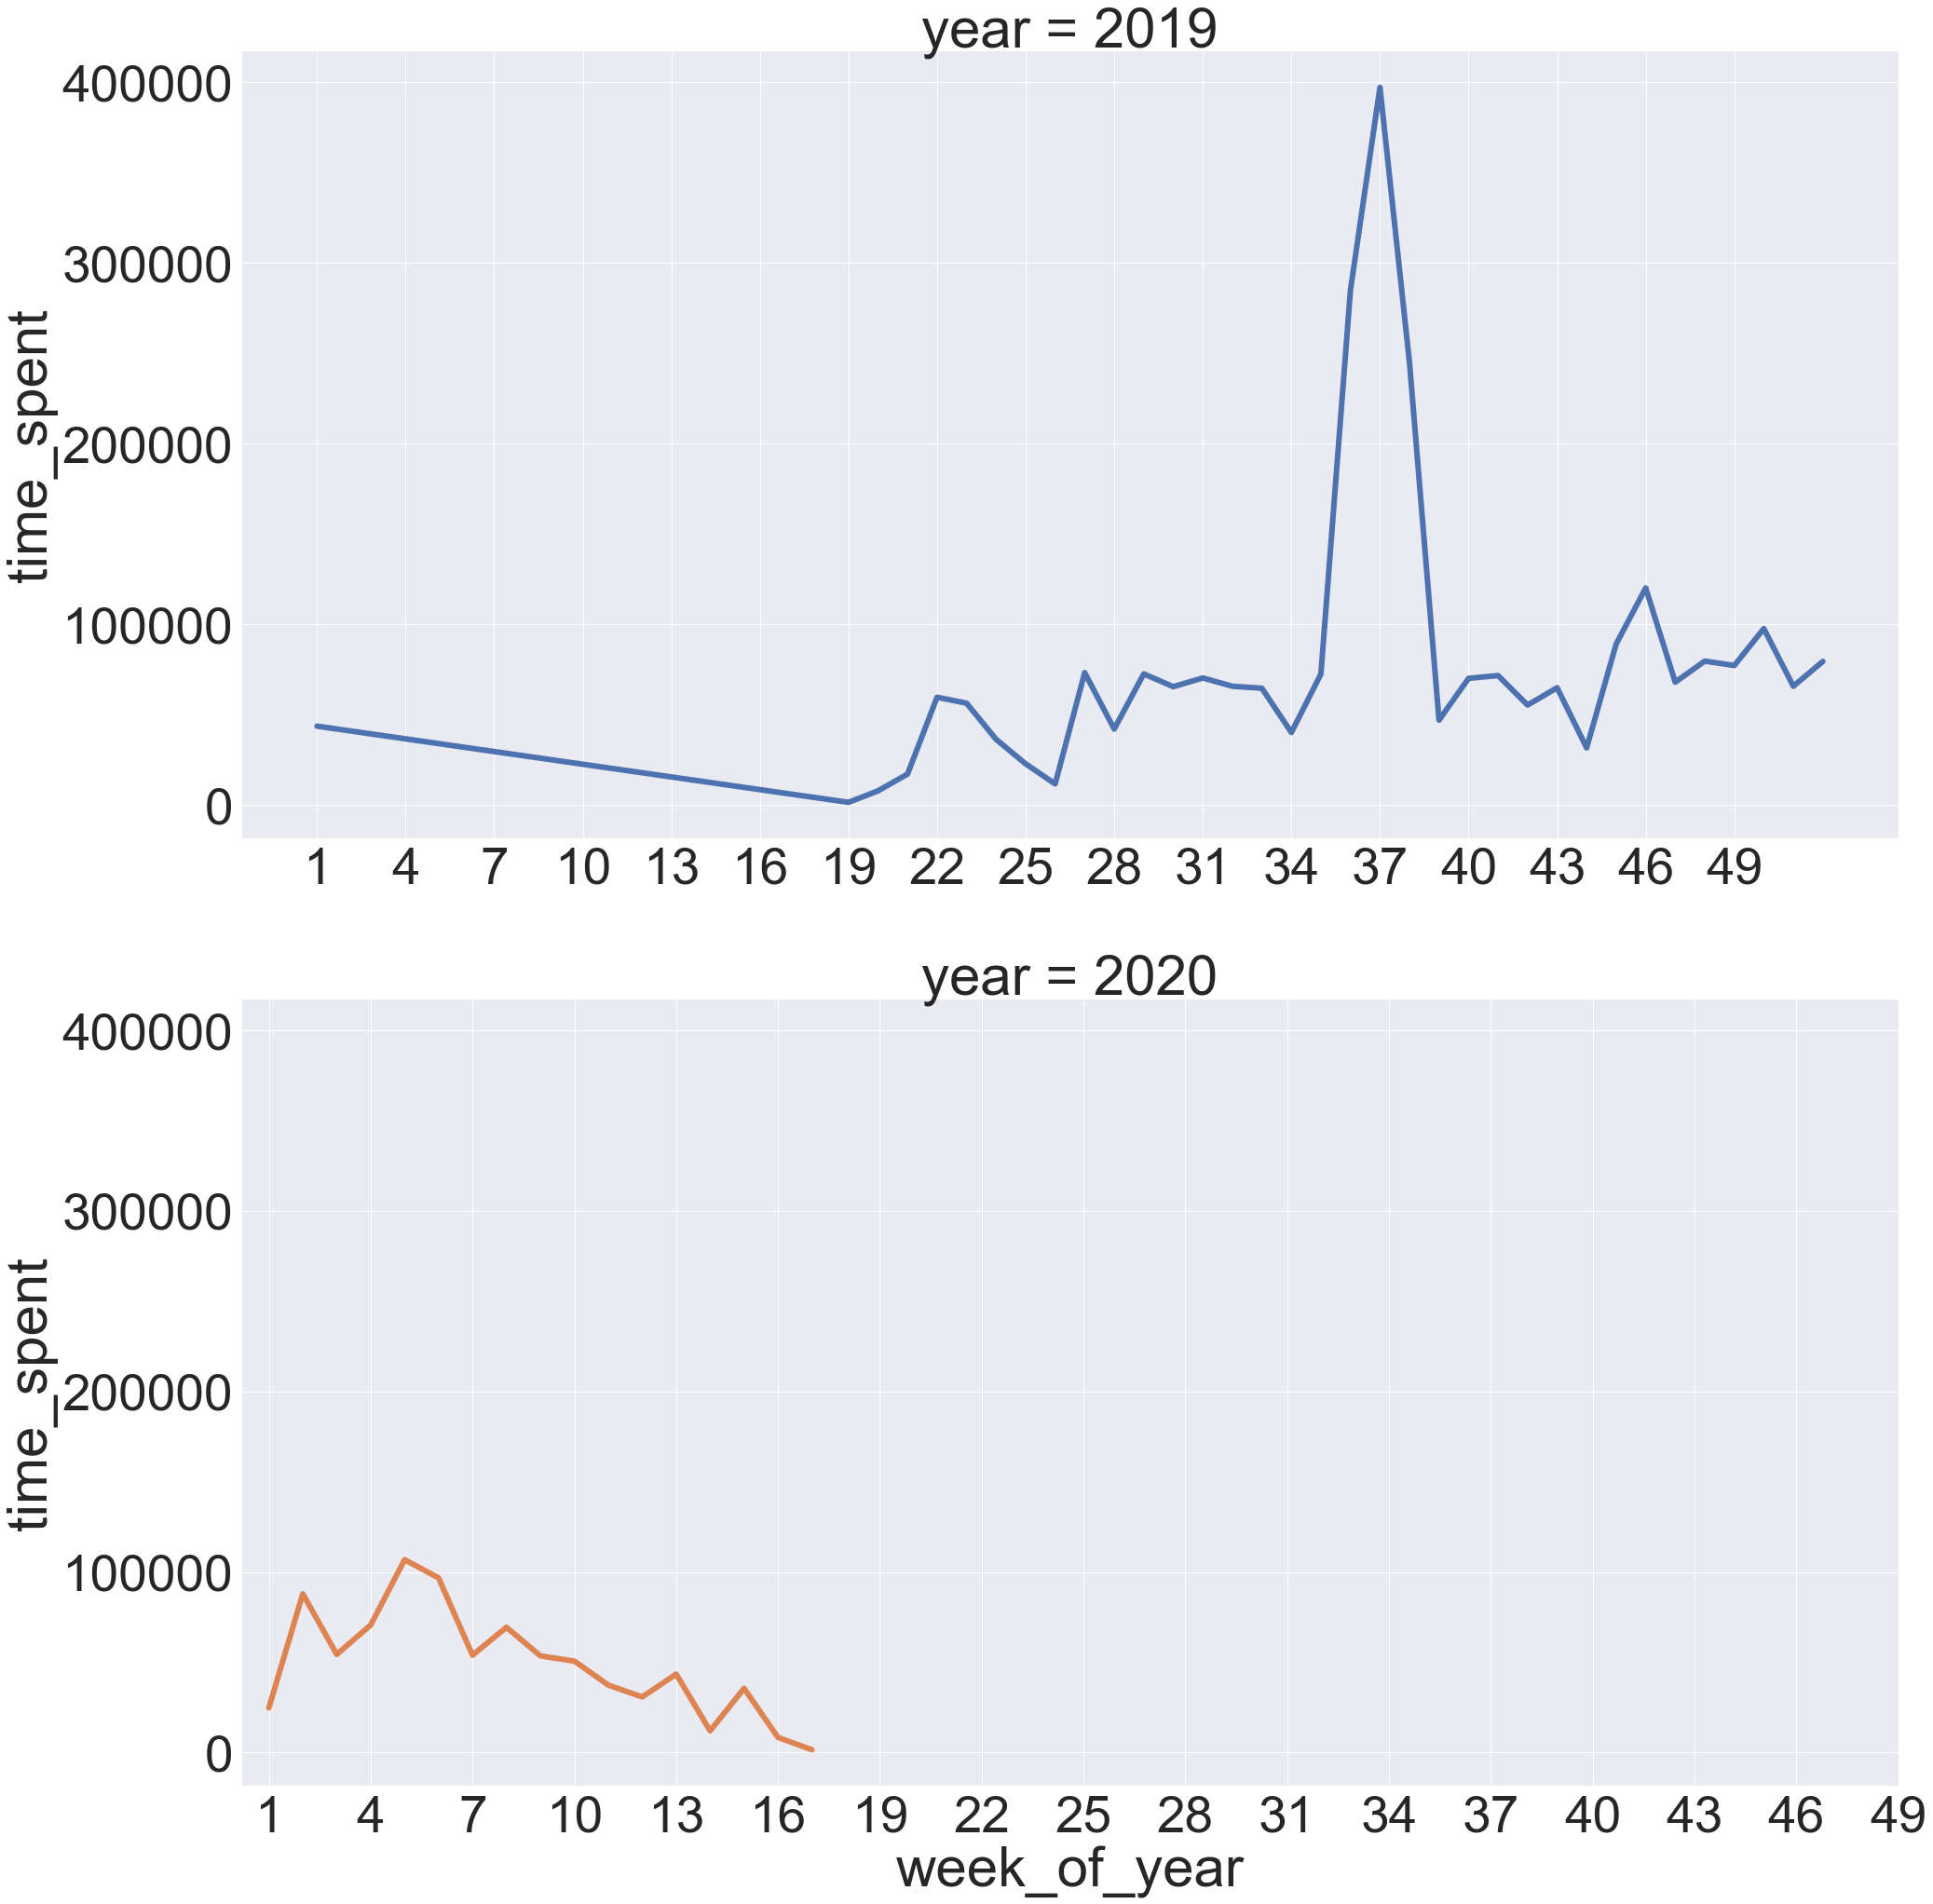

In [28]:
plt.figure(figsize=(12,10))
week_year_spent=sns.FacetGrid(week_year_spent,despine=True,row='year',hue='year',sharey=True,sharex=False,height=15,aspect=2)
sns.set(font_scale=5)
week_year_spent.map(sns.lineplot,'week_of_year','time_spent',linewidth = 6,sort=True)
week_year_spent.set(xticks=(np.arange(1,52,3)))

The above plot shows that in the year 2019, highest number of customer activity recorded in the week 37.
In 2020, week 2, 4, 5 has recorded highest number of customer activity.

Let's see which day of the week has the highest number of customer activity in each month of the years 2019 & 2020.

In [29]:
day_week_spent = dftrain.groupby(['year','month_label','month_number','day_number','day_label']).agg({'time_spent':['sum']})
day_week_spent.columns =['time_spent']
day_week_spent= day_week_spent.reset_index()
day_week_spent = day_week_spent.sort_values(['month_number','day_number'],ascending=True)
day_week_spent 

,year,month_label,month_number,day_number,day_label,time_spent
70,2020,Jan,1,0,Monday,43205.976
71,2020,Jan,1,1,Tuesday,40385.692
72,2020,Jan,1,2,Wednesday,35792.075
73,2020,Jan,1,3,Thursday,62778.004
74,2020,Jan,1,4,Friday,53216.068
...,...,...,...,...,...,...
9,2019,Dec,12,2,Wednesday,27748.977
10,2019,Dec,12,3,Thursday,47882.580
11,2019,Dec,12,4,Friday,37283.641
12,2019,Dec,12,5,Saturday,28812.208


<Figure size 864x720 with 0 Axes>

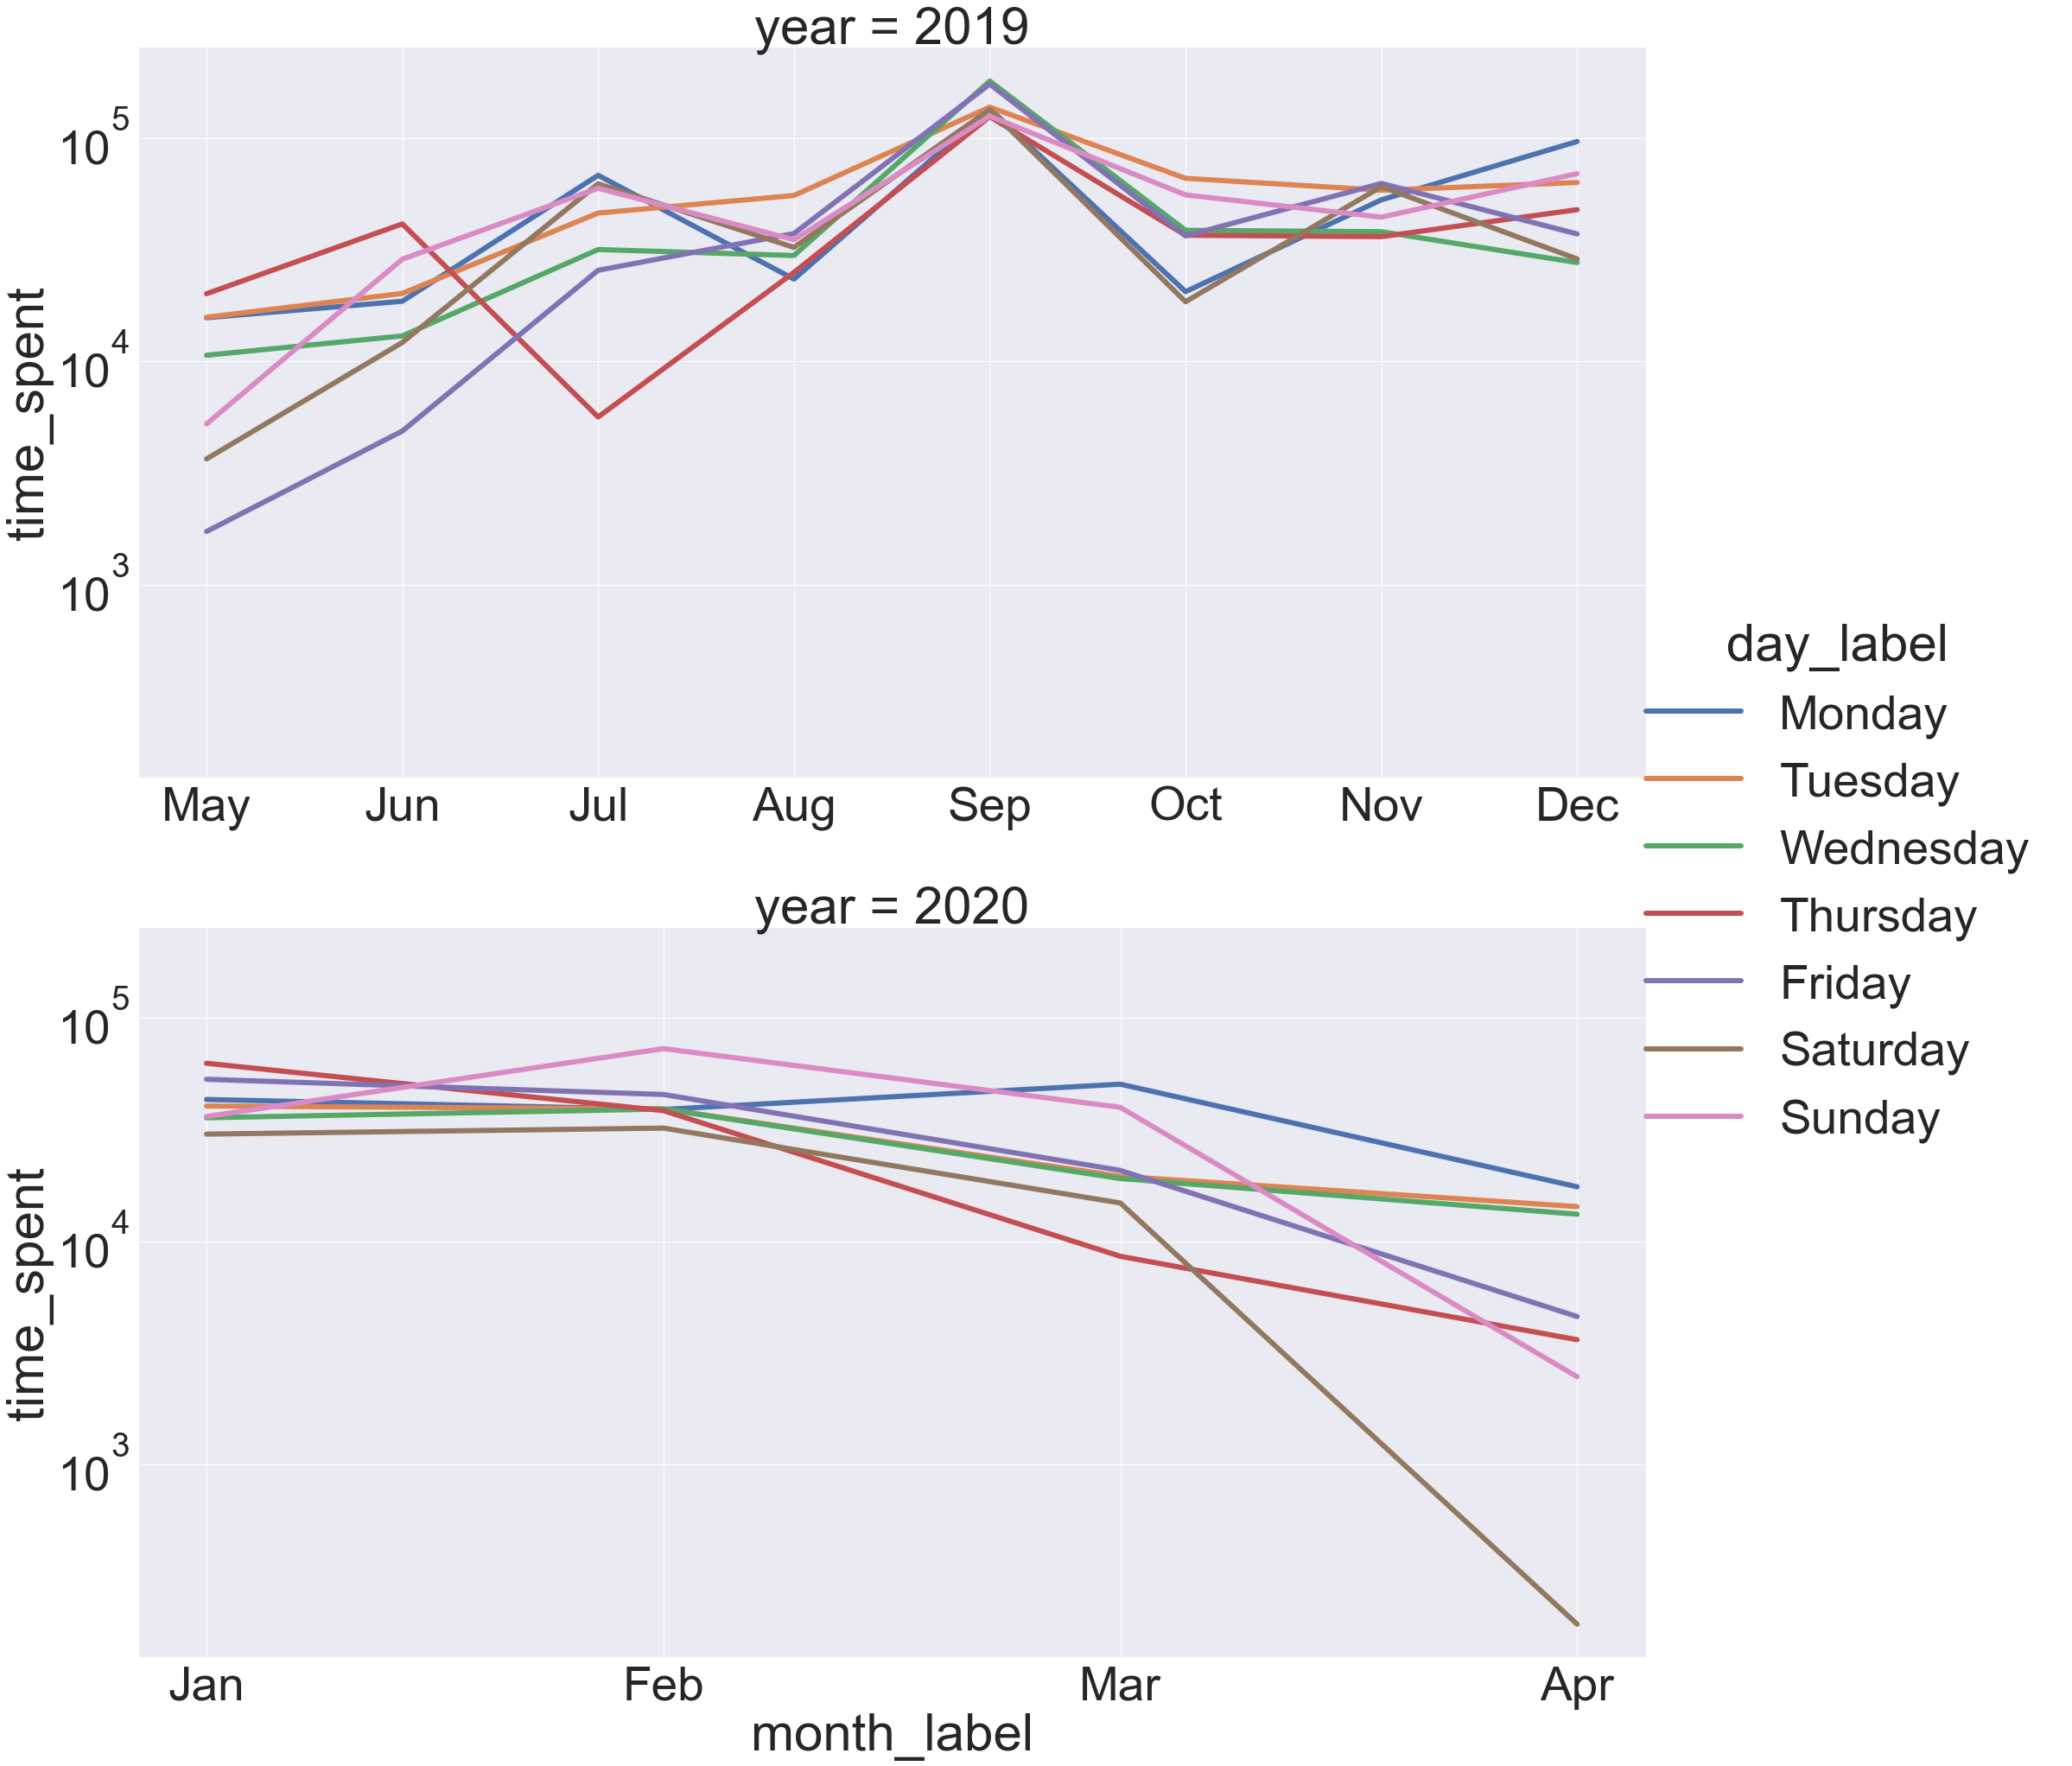

In [30]:
plt.figure(figsize=(12,10))
time_spent_dayweek = sns.FacetGrid(day_week_spent,despine=True, row="year", hue="day_label",sharey=True, sharex=False, height=15, aspect = 2)
sns.set(font_scale=5)
time_spent_dayweek.map(sns.lineplot,"month_label","time_spent",linewidth = 6).set(yscale = 'log')
time_spent_dayweek.add_legend()

The above chart shows that in the year 2019, the highest number of customer activity recorded on each day of the week in September.In 2020 the lowest customer activity recorded in april month saturday's 
and highest customer activity recorded in february month sunday's.

Let's see the customer's spending time on website with calendar plot

In [31]:
events = pd.Series(dftrain["time_spent"].values, index=dftrain["date"])
events

date
2020-01-22     236.886
2020-02-27    1277.455
2019-08-01      21.704
2019-12-30     455.201
2019-09-10    1164.877
                ...   
2019-11-20      20.601
2019-09-26    1537.666
2019-08-13      22.711
2019-06-18      20.844
2019-10-21      20.504
Length: 5429, dtype: float64

Let's see the customer's spending time on website with calendar plot

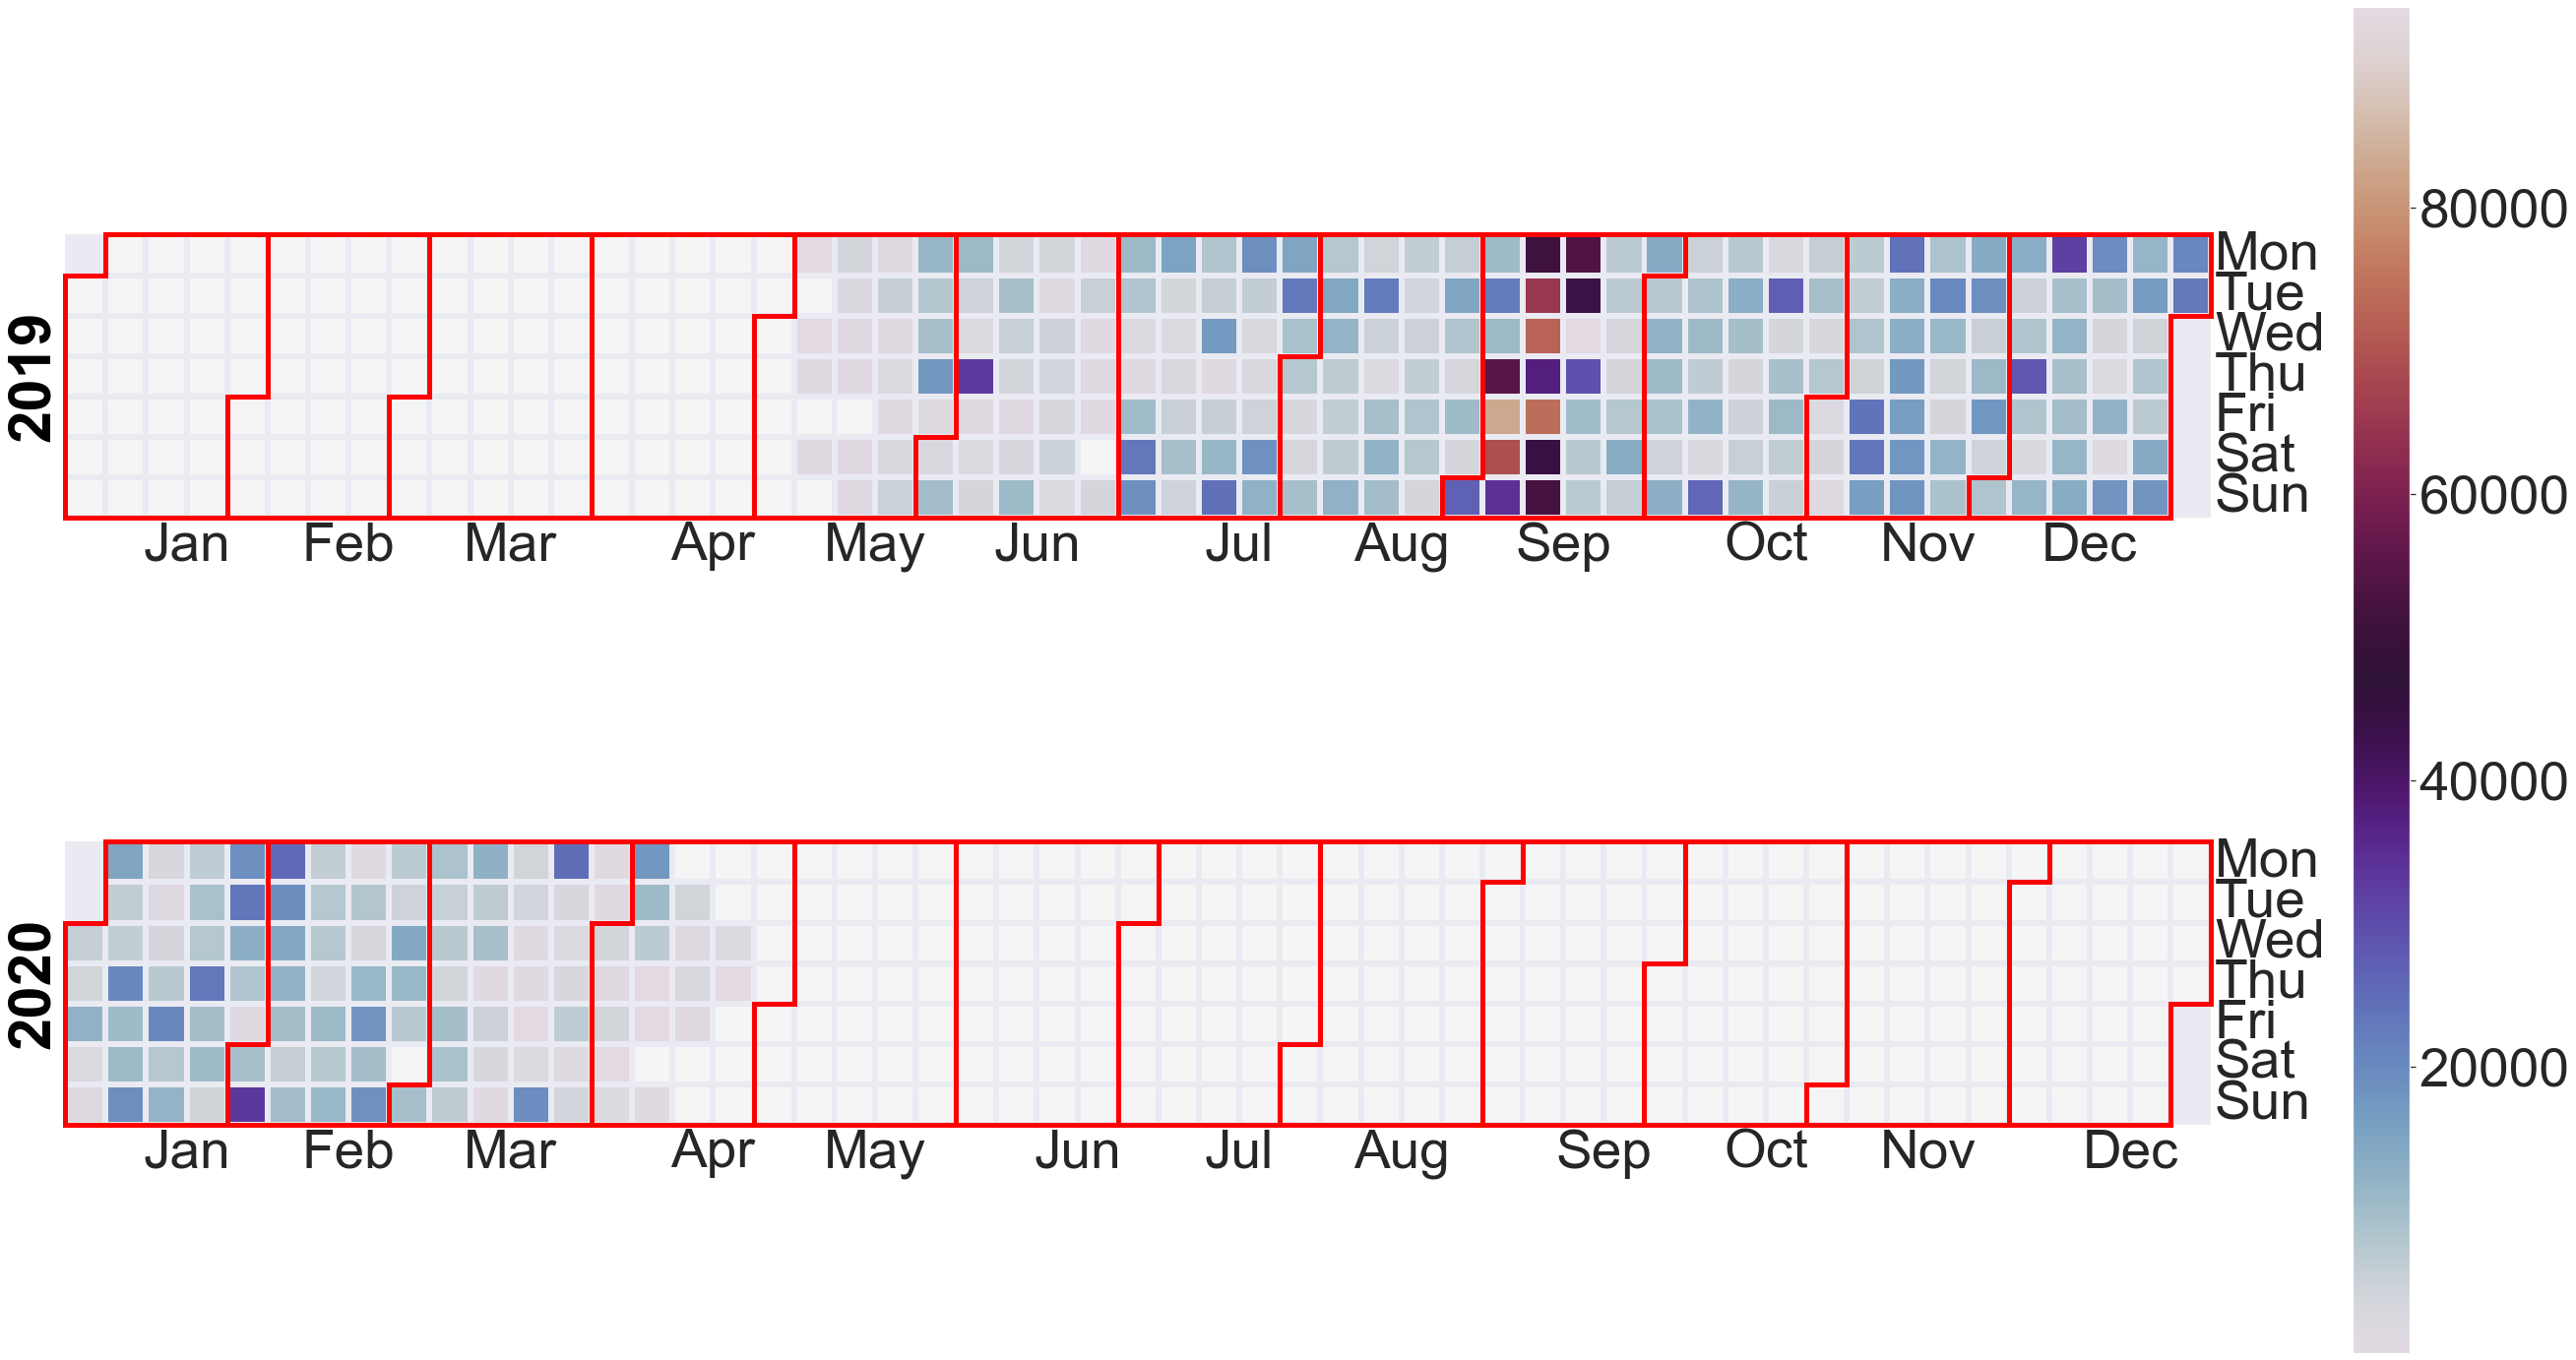

In [32]:
cal_plot=calplot.calplot(events,edgecolor="red",yearcolor="black",cmap='twilight',linewidth=5,
                         yearlabel_kws = {"fontsize":"medium"},
                        figsize=(40,20))

In [33]:
dftrain.groupby(["purchased","added_in_cart","checked_out"], as_index=False).size()

,purchased,added_in_cart,checked_out,size
0,0,0,0,3847
1,0,0,1,11
2,0,1,0,682
3,0,1,1,25
4,1,0,0,679
5,1,0,1,12
6,1,1,0,126
7,1,1,1,47


In [34]:
conditionstrain =[(dftrain['purchased']==0)&(dftrain['added_in_cart']==0)& (dftrain['checked_out']==0),
            (dftrain['purchased']==0)&(dftrain['added_in_cart']==0)& (dftrain['checked_out']==1),
            (dftrain['purchased']==0)&(dftrain['added_in_cart']==1)& (dftrain['checked_out']==0),
            (dftrain['purchased']==0)&(dftrain['added_in_cart']==1)& (dftrain['checked_out']==1),
            (dftrain['purchased']==1)&(dftrain['added_in_cart']==0)& (dftrain['checked_out']==0),
            (dftrain['purchased']==1)&(dftrain['added_in_cart']==0)& (dftrain['checked_out']==1),
            (dftrain['purchased']==1)&(dftrain['added_in_cart']==1)& (dftrain['checked_out']==0),
            (dftrain['purchased']==1)&(dftrain['added_in_cart']==1)& (dftrain['checked_out']==1)]

conditionstest =[(dftest['purchased']==0)&(dftest['added_in_cart']==0)& (dftest['checked_out']==0),
            (dftest['purchased']==0)&(dftest['added_in_cart']==0)& (dftest['checked_out']==1),
            (dftest['purchased']==0)&(dftest['added_in_cart']==1)& (dftest['checked_out']==0),
            (dftest['purchased']==0)&(dftest['added_in_cart']==1)& (dftest['checked_out']==1),
            (dftest['purchased']==1)&(dftest['added_in_cart']==0)& (dftest['checked_out']==0),
            (dftest['purchased']==1)&(dftest['added_in_cart']==0)& (dftest['checked_out']==1),
            (dftest['purchased']==1)&(dftest['added_in_cart']==1)& (dftest['checked_out']==0),
            (dftest['purchased']==1)&(dftest['added_in_cart']==1)& (dftest['checked_out']==1)]

values = ['no_activity', 'chk', 'add', 'add_chk','purc','purc_chk','purc_add','purc_add_chk']

In [35]:
dftrain['customer_activity'] = np.select(conditionstrain, values)
dftest['customer_activity'] = np.select(conditionstest, values)

In [36]:
dftrain.head()

,session_id,session_number,client_agent,device_details,date,purchased,added_in_cart,checked_out,time_spent,datepurch,day,day_label,day_number,month_number,month_label,year_quarter,week_of_year,year,customer_activity
0,57f879e70d3c5fc2a98102d64c9fd84e,715,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2020-01-22,1,0,0,236.886,92 days,22,Wednesday,2,1,Jan,1,4,2020,purc
1,a5442b0c7c33d0a811e7661e556b2de8,55,Product/8.0 iPhone/8.1.3,iPhone - iOS,2020-02-27,1,0,0,1277.455,56 days,27,Thursday,3,2,Feb,1,9,2020,purc
2,305cb1486ed8610c00b37007926cb2c4,11,Mozilla/5.0 (iPhone; CPU iPhone OS 7_1_2 like ...,iPhone - MobileWeb,2019-08-01,0,0,0,21.704,266 days,1,Thursday,3,8,Aug,3,31,2019,no_activity
3,f2c1ecc9993f0071df91ba178450498c,2794,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Desktop - IE,2019-12-30,0,1,0,455.201,115 days,30,Monday,0,12,Dec,4,1,2019,add
4,e460830ae295e55d2216ebdc761ab9a6,3674,Mozilla/5.0 (iPhone; CPU iPhone OS 7_1_1 like ...,iPhone - Web,2019-09-10,0,0,0,1164.877,226 days,10,Tuesday,1,9,Sep,3,37,2019,no_activity


In [37]:
dftrain.drop(['session_id','client_agent','purchased','added_in_cart','checked_out'],axis=1, inplace=True)
dftest.drop(['session_id','client_agent','purchased','added_in_cart','checked_out'],axis=1, inplace=True)

In [38]:
dftrain.head()

,session_number,device_details,date,time_spent,datepurch,day,day_label,day_number,month_number,month_label,year_quarter,week_of_year,year,customer_activity
0,715,Desktop - Chrome,2020-01-22,236.886,92 days,22,Wednesday,2,1,Jan,1,4,2020,purc
1,55,iPhone - iOS,2020-02-27,1277.455,56 days,27,Thursday,3,2,Feb,1,9,2020,purc
2,11,iPhone - MobileWeb,2019-08-01,21.704,266 days,1,Thursday,3,8,Aug,3,31,2019,no_activity
3,2794,Desktop - IE,2019-12-30,455.201,115 days,30,Monday,0,12,Dec,4,1,2019,add
4,3674,iPhone - Web,2019-09-10,1164.877,226 days,10,Tuesday,1,9,Sep,3,37,2019,no_activity


Text(0.5, 1.0, 'Customer Activity on the website')

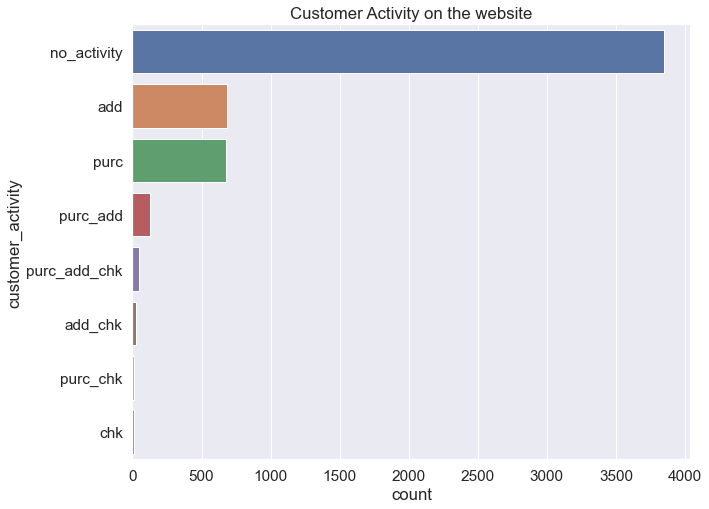

In [39]:
plt.figure(figsize=(10,8))
sns.despine(left=True,bottom=True)
sns.set_theme(style="ticks")
sns.set(font_scale=1.4)
sns.countplot(y='customer_activity',
             data=dftrain,
             order= dftrain["customer_activity"].value_counts().index)

plt.title("Customer Activity on the website")

In [40]:
dftrain['customer_activity'].value_counts()

no_activity     3847
add              682
purc             679
purc_add         126
purc_add_chk      47
add_chk           25
purc_chk          12
chk               11
Name: customer_activity, dtype: int64

The above statement shows that the customers are just visiting the site to browse with no purchase being made

In [41]:
##### Let's see the customer spending time on website and see how its changes on various customer activity.

Text(0.5, 1.0, 'Customers Activities Time spent Distributioin using violin plot')

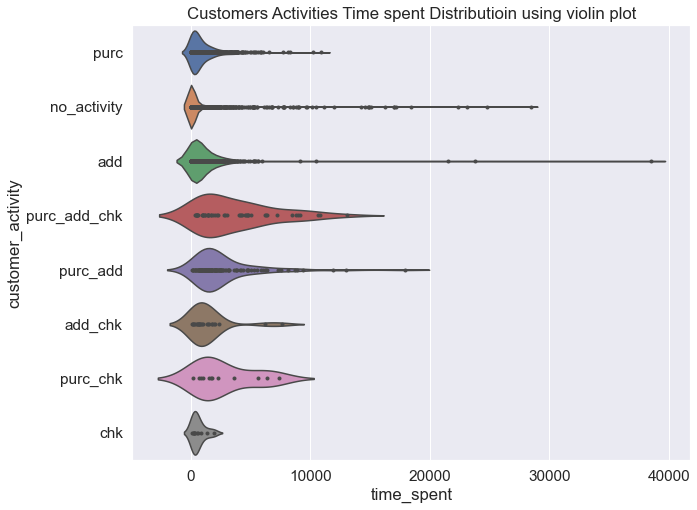

In [42]:
plt.figure(figsize=(10,8))
sns.despine(left=True,bottom=True)
sns.set_theme(style="ticks")
sns.set(font_scale=1.4)
sns.violinplot(data=dftrain,inner='point',
              y='customer_activity',x='time_spent',scale='width')
plt.title('Customers Activities Time spent Distributioin using violin plot')

The above plot explains that customers are spending more time only for adding the 
product to their shopping cart and just visiting the site

In [43]:
cust_activity =dftrain.groupby(['year','month_number','month_label','customer_activity']).agg({'customer_activity':['count']})
cust_activity.columns =['activity']
cust_activity = cust_activity.reset_index()
cust_activity = cust_activity.sort_values('month_number',ascending=True)
cust_activity

,year,month_number,month_label,customer_activity,activity
61,2020,1,Jan,purc,77
58,2020,1,Jan,add_chk,3
59,2020,1,Jan,chk,1
60,2020,1,Jan,no_activity,379
63,2020,1,Jan,purc_add_chk,5
...,...,...,...,...,...
51,2019,12,Dec,add_chk,3
52,2019,12,Dec,chk,1
53,2019,12,Dec,no_activity,564
56,2019,12,Dec,purc_add_chk,5


<Figure size 1080x720 with 0 Axes>

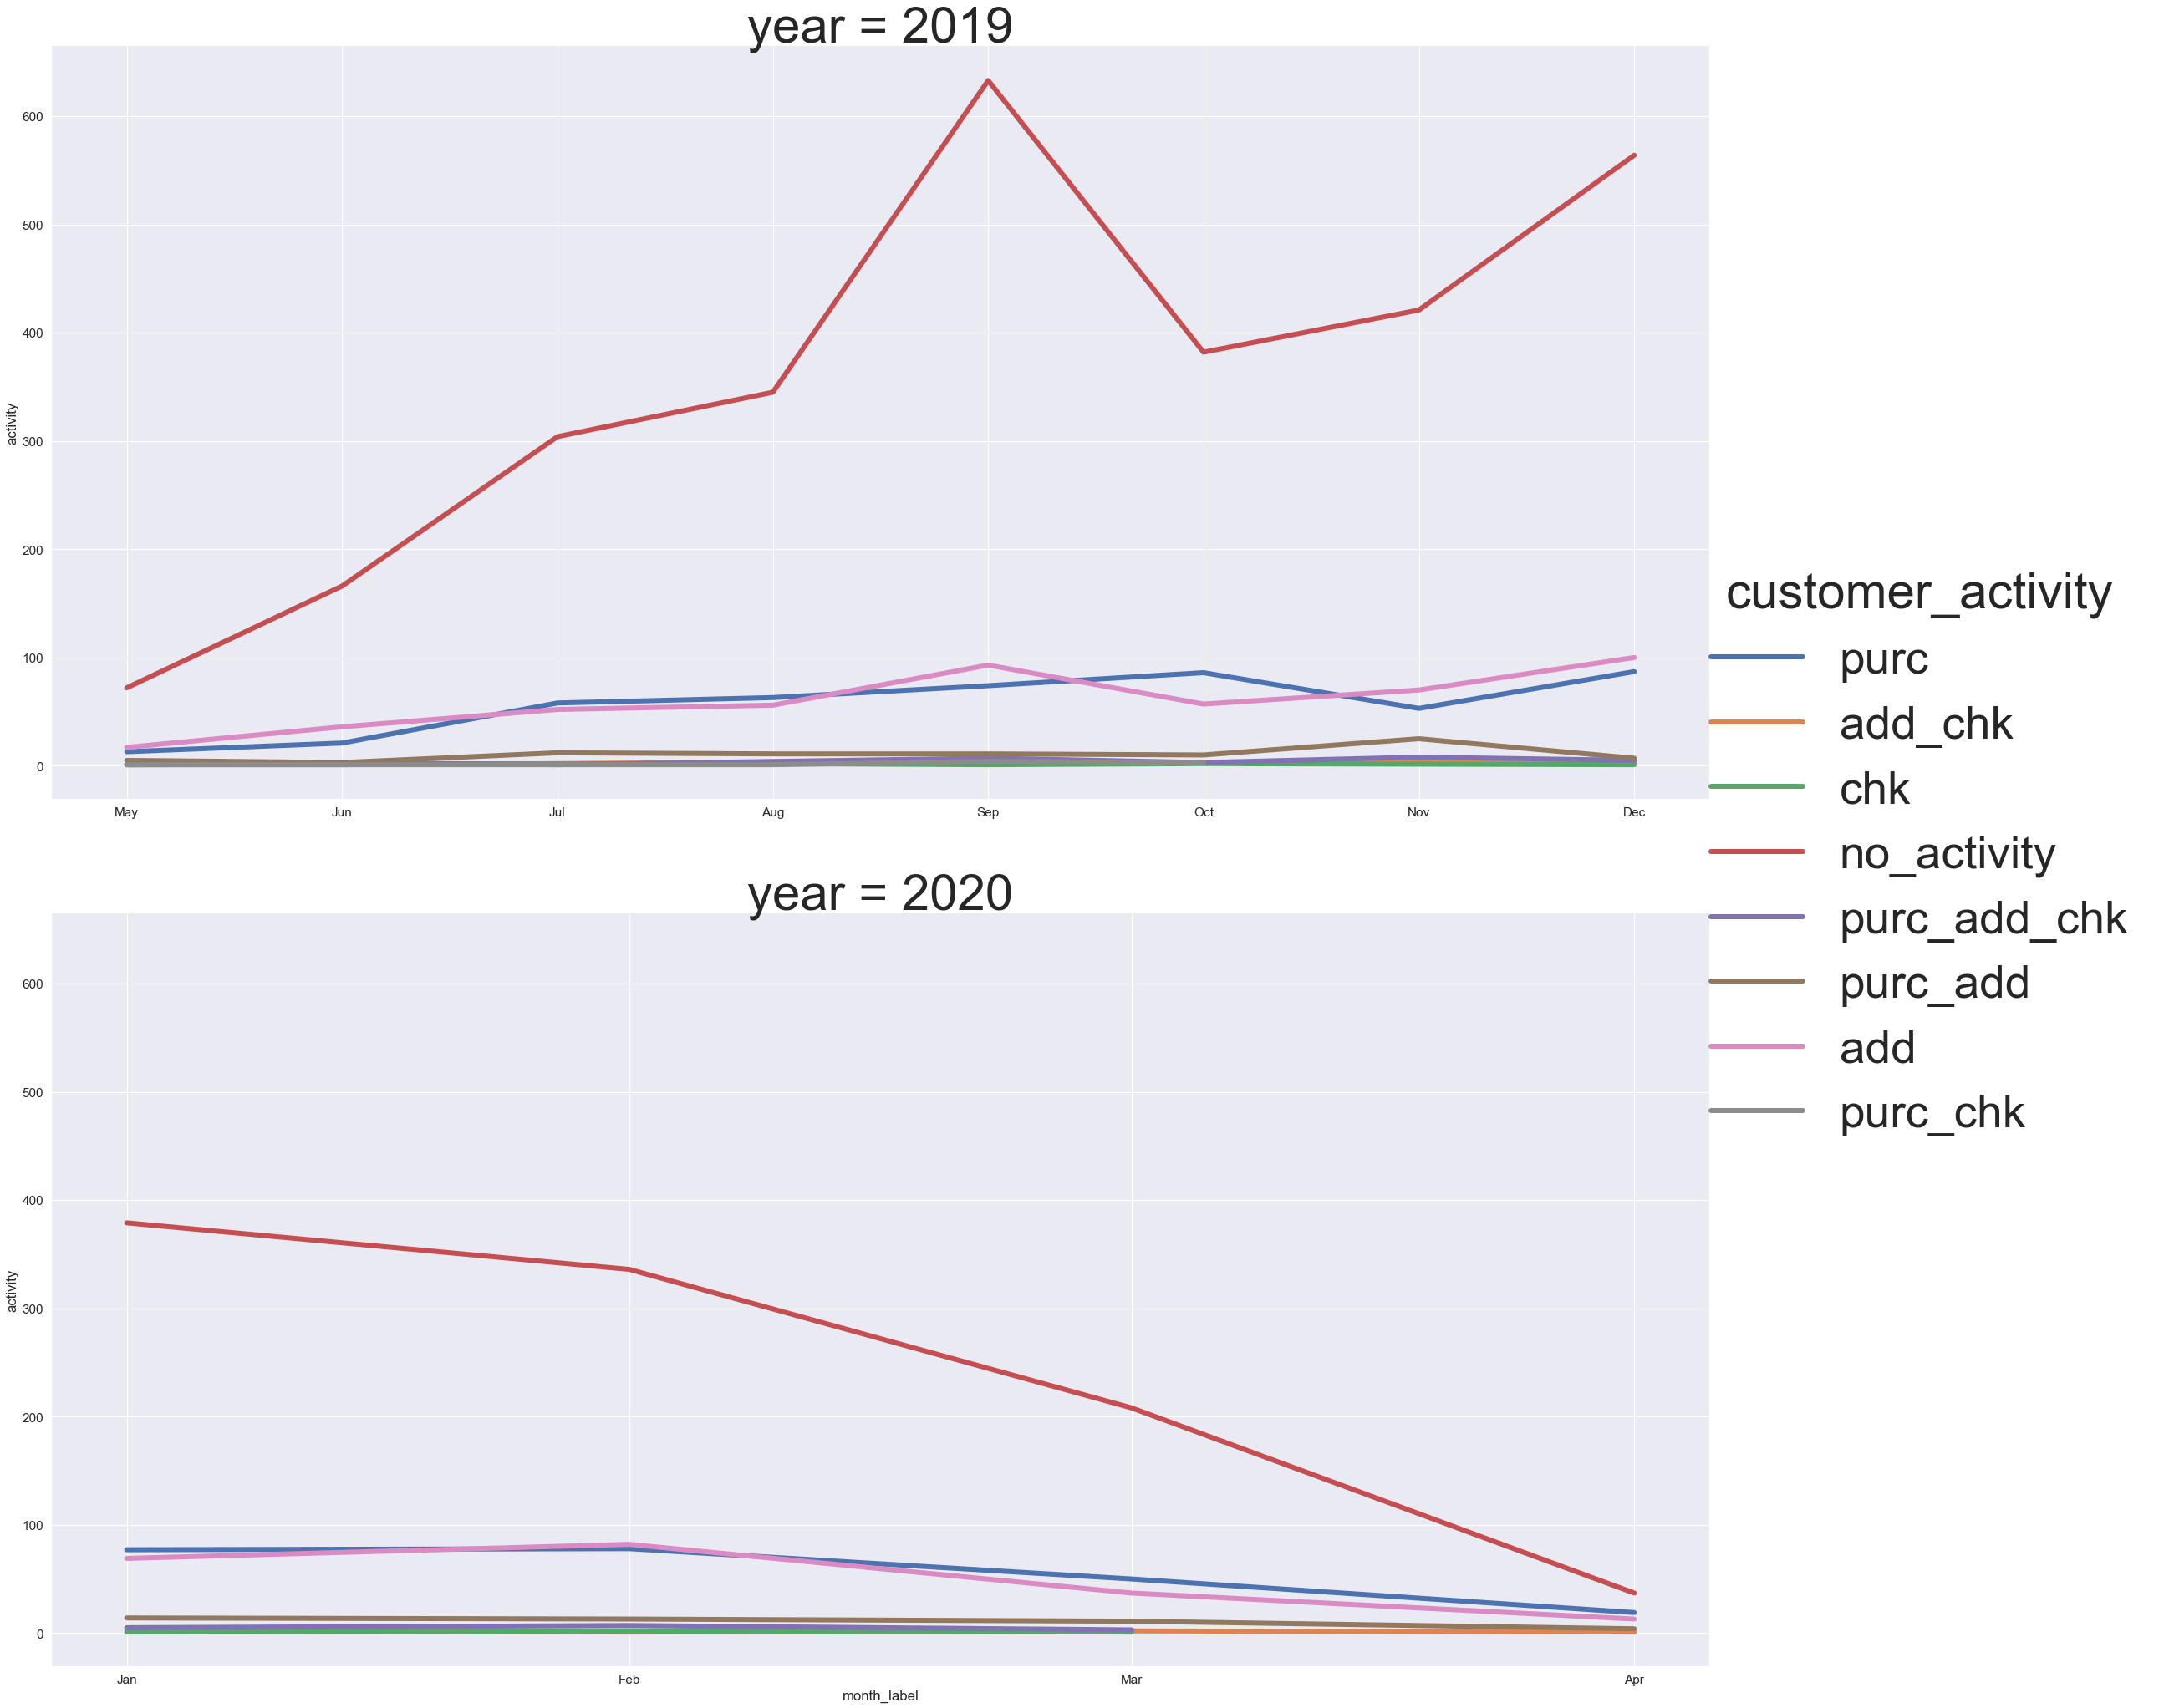

In [44]:
plt.figure(figsize=(15,10))
cust_activity_my_plot = sns.FacetGrid(cust_activity,despine=True, row="year", hue="customer_activity",sharey=True, sharex=False, height=15, aspect = 2)
sns.set(font_scale=5)
cust_activity_my_plot.map(sns.lineplot,"month_label","activity",linewidth = 6)
cust_activity_my_plot.add_legend()

Previously have seen that the highest customer activity in 2019's September. in that most of them are only visiting the website. The same applies to the year 2020's January and February.¶
In 2020 April, all types of customer activity count decreased under 100

Let's see the customer activity on various device.

In [45]:
cust_activity_device =dftrain.groupby(['device_details','customer_activity']).agg({'customer_activity':['count']})
cust_activity_device.columns=['activity_count']
cust_activity_device =cust_activity_device.reset_index()
cust_activity_device = cust_activity_device.sort_values('activity_count', ascending=False)
cust_activity_device

,device_details,customer_activity,activity_count
77,iPhone - iOS,no_activity,1091
72,iPhone - Web,no_activity,655
22,Desktop - Chrome,no_activity,465
69,iPhone - MobileWeb,no_activity,256
74,iPhone - iOS,add,233
...,...,...,...
10,Android Phone - Web,purc,1
56,iPad - Web,chk,1
1,Android Phone - Android,add_chk,1
44,Desktop - Safari,chk,1


<Figure size 720x720 with 0 Axes>

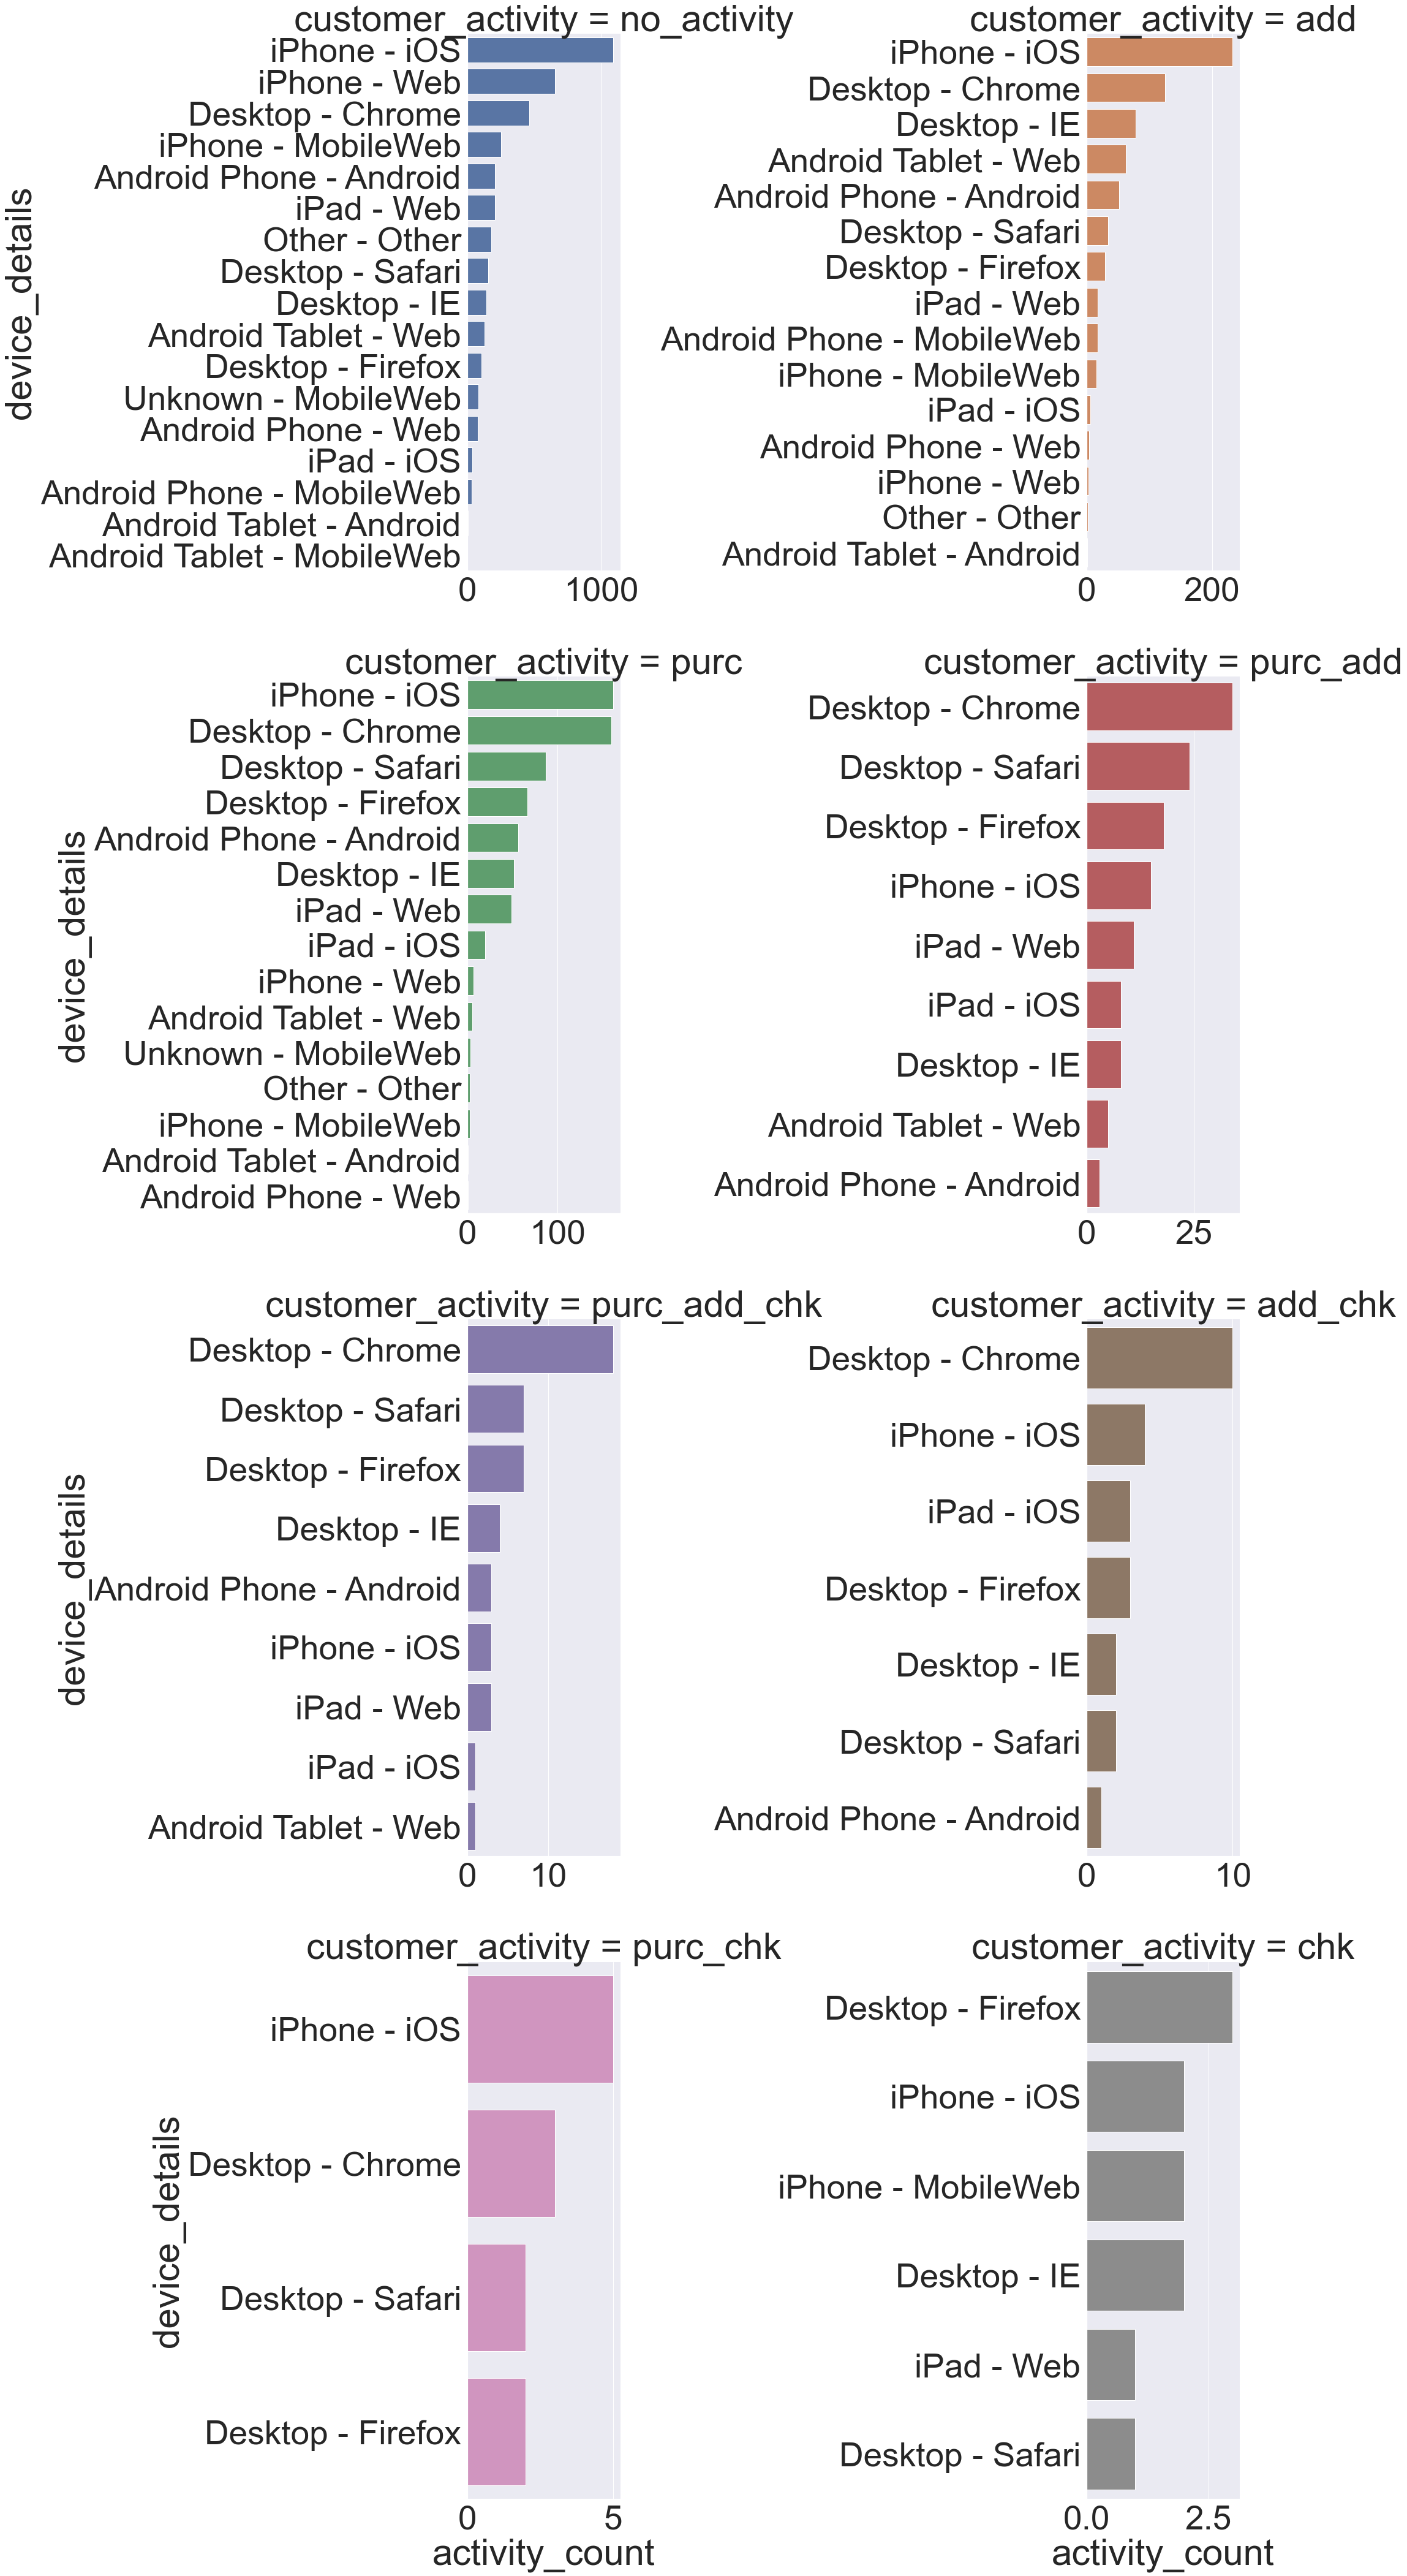

In [46]:
plt.figure(figsize=(10,10))
cust_activity = sns.FacetGrid(cust_activity_device,despine=True,col='customer_activity',hue='customer_activity',
                             sharey=False, sharex=False,height=15, col_wrap=2)
sns.set(font_scale=5)
cust_activity.map(sns.barplot,"activity_count","device_details")

In [47]:
dftrain.corr()

,session_number,time_spent,day,day_number,month_number,year_quarter,week_of_year,year
session_number,1.000000,0.078437,-0.002180,0.005694,0.076441,0.035236,0.073514,0.010174
time_spent,0.078437,1.000000,-0.030206,0.000285,0.013367,0.001644,0.008201,-0.030843
day,-0.002180,-0.030206,1.000000,-0.019268,0.050067,0.069822,0.074466,-0.087050
day_number,0.005694,0.000285,-0.019268,1.000000,0.003460,-0.002693,0.023107,0.002492
month_number,0.076441,0.013367,0.050067,0.003460,1.000000,0.975688,0.951266,-0.884790
year_quarter,0.035236,0.001644,0.069822,-0.002693,0.975688,1.000000,0.934618,-0.880020
week_of_year,0.073514,0.008201,0.074466,0.023107,0.951266,0.934618,1.000000,-0.858398
year,0.010174,-0.030843,-0.087050,0.002492,-0.884790,-0.880020,-0.858398,1.000000


year_quarter and week_of_year are highly correlated with month_number, also both year_quarter and week_of_year 
are highly correlated with each other, so its good to remove 'week_of_year' and 'year_quarter'

In [48]:
dftrain.head()

,session_number,device_details,date,time_spent,datepurch,day,day_label,day_number,month_number,month_label,year_quarter,week_of_year,year,customer_activity
0,715,Desktop - Chrome,2020-01-22,236.886,92 days,22,Wednesday,2,1,Jan,1,4,2020,purc
1,55,iPhone - iOS,2020-02-27,1277.455,56 days,27,Thursday,3,2,Feb,1,9,2020,purc
2,11,iPhone - MobileWeb,2019-08-01,21.704,266 days,1,Thursday,3,8,Aug,3,31,2019,no_activity
3,2794,Desktop - IE,2019-12-30,455.201,115 days,30,Monday,0,12,Dec,4,1,2019,add
4,3674,iPhone - Web,2019-09-10,1164.877,226 days,10,Tuesday,1,9,Sep,3,37,2019,no_activity


In [54]:
dftrain.drop(['year_quarter','week_of_year'], axis=1, inplace=True)
dftest.drop(['year_quarter','week_of_year'], axis=1, inplace=True)

KeyError: "['year_quarter' 'week_of_year'] not found in axis"

In [55]:
dftrain.drop(['date'], axis=1, inplace=True)
dftest.drop(['date'], axis=1, inplace=True)

KeyError: "['date'] not found in axis"

In [57]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for column in ['device_details','day_label','month_label','customer_activity']:
    dftrain[column]= le.fit_transform(dftrain[column])
    dftest[column]= le.fit_transform(dftest[column])

In [58]:
dftrain.head()

,session_number,device_details,time_spent,datepurch,day,day_label,day_number,month_number,month_label,year,customer_activity
0,715,6,236.886,92 days,22,6,2,1,4,2020,4
1,55,16,1277.455,56 days,27,4,3,2,3,2020,4
2,11,14,21.704,266 days,1,4,3,8,1,2019,3
3,2794,8,455.201,115 days,30,1,0,12,2,2019,0
4,3674,15,1164.877,226 days,10,5,1,9,11,2019,3


In [63]:
dftest.head()

,session_number,device_details,datepurch,day,day_label,day_number,month_number,month_label,year,customer_activity
0,99,7,103 days,7,5,1,1,4,2020,4
1,935,0,66 days,13,4,3,2,3,2020,3
2,902,15,188 days,14,1,0,10,10,2019,4
3,3223,7,84 days,26,3,6,1,4,2020,3
4,231,5,81 days,29,6,2,1,4,2020,3


In [59]:
X=dftrain.drop(['time_spent','datepurch'], axis=1)
y=dftrain['time_spent']

In [60]:
from sklearn.svm import SVR
modelSVR = SVR(kernel = 'poly',degree=7)
modelSVR.fit(X, y)

SVR(degree=7, kernel='poly')

In [64]:
y_pred_test=abs(modelSVR.predict(dftest.drop('datepurch',axis=1)))

In [65]:
samplesubmission = pd.DataFrame({'time_spent':y_pred_test})
samplesubmission.to_csv('SubmissionSVRAnalysis.csv',index=False)

<AxesSubplot:ylabel='Density'>

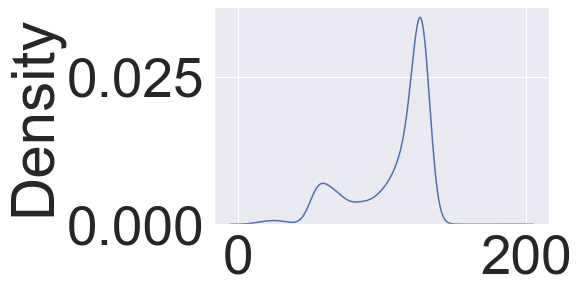

In [66]:
sns.kdeplot(y_pred_test)

# With Modifications to DateTime column

In [68]:
dftrain['datepurch']= dftrain['datepurch'].astype(str)
dftest['datepurch']= dftest['datepurch'].astype(str)

In [69]:
dftrain['datepurch']= dftrain['datepurch'].str.split(' ').str[0]
dftest['datepurch']= dftest['datepurch'].str.split(' ').str[0]

In [70]:
dftrain['datepurch']= dftrain['datepurch'].astype(int)
dftest['datepurch']= dftest['datepurch'].astype(int)

In [71]:
dftrain.head()

,session_number,device_details,time_spent,datepurch,day,day_label,day_number,month_number,month_label,year,customer_activity
0,715,6,236.886,92,22,6,2,1,4,2020,4
1,55,16,1277.455,56,27,4,3,2,3,2020,4
2,11,14,21.704,266,1,4,3,8,1,2019,3
3,2794,8,455.201,115,30,1,0,12,2,2019,0
4,3674,15,1164.877,226,10,5,1,9,11,2019,3


In [72]:
dftrain.drop(['day','day_label','day_number','month_number','month_label','year'],axis=1, inplace=True)
dftest.drop(['day','day_label','day_number','month_number','month_label','year'],axis=1, inplace=True)

In [73]:
X=dftrain.drop(['time_spent'], axis=1)
y=dftrain['time_spent']

In [74]:
modelSVR = SVR(kernel = 'poly',degree=7)
modelSVR.fit(X, y)

SVR(degree=7, kernel='poly')

In [75]:
y_pred_test=abs(modelSVR.predict(dftest))

In [76]:
samplesubmission = pd.DataFrame({'time_spent':y_pred_test})
samplesubmission.to_csv('SubmissionSVRAnalysisDateDrop.csv',index=False)

<AxesSubplot:ylabel='Density'>

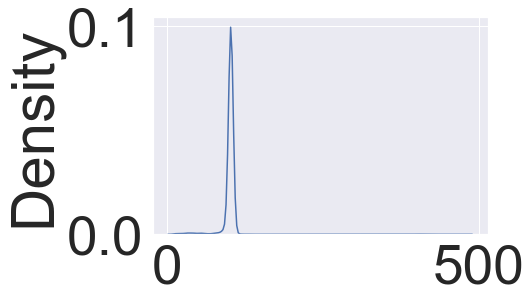

In [77]:
sns.kdeplot(y_pred_test)